In [1]:
import sys
sys.path.insert(0, "C:\\Users\\bradm\\conflictmodel\\conflictmodel")

In [2]:
import csv
import random
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np

import conflict_model as cm


import pandas as pd
import os


In [3]:
L = 7
numbers = 1000

In [4]:
output_folder = "outputfolder\\seapower7x7"

### Run simulation

In [ ]:
for density in interval:
    simulation = cm.Simulation(L, numbers, density=density)
    df, grid, commitment_matrix = simulation.run_simulation()

    # Save the results with distinctive names in the output folder
    df.to_csv(os.path.join(output_folder, f"df_density_{density}.csv"), index=False)
    np.save(os.path.join(output_folder, f"grid_density_{density}.npy"), grid)
    np.save(os.path.join(output_folder, f"commitment_matrix_density_{density}.npy"), commitment_matrix)


In [5]:
interval = np.round(np.arange(0.00, 0.825, 0.025), decimals=2)

In [6]:
len(interval)

33

In [7]:
interval

array([0.  , 0.02, 0.05, 0.08, 0.1 , 0.12, 0.15, 0.18, 0.2 , 0.22, 0.25,
       0.28, 0.3 , 0.32, 0.35, 0.38, 0.4 , 0.43, 0.45, 0.48, 0.5 , 0.52,
       0.55, 0.58, 0.6 , 0.62, 0.65, 0.68, 0.7 , 0.73, 0.75, 0.78, 0.8 ])

In [8]:
interval1 = interval[:33//2]
interval2 = interval[33//2:]

In [ ]:
interval1

In [ ]:
interval2

## Data Analysis

### Activity and total Resources

In [9]:
bifurcation_points = []

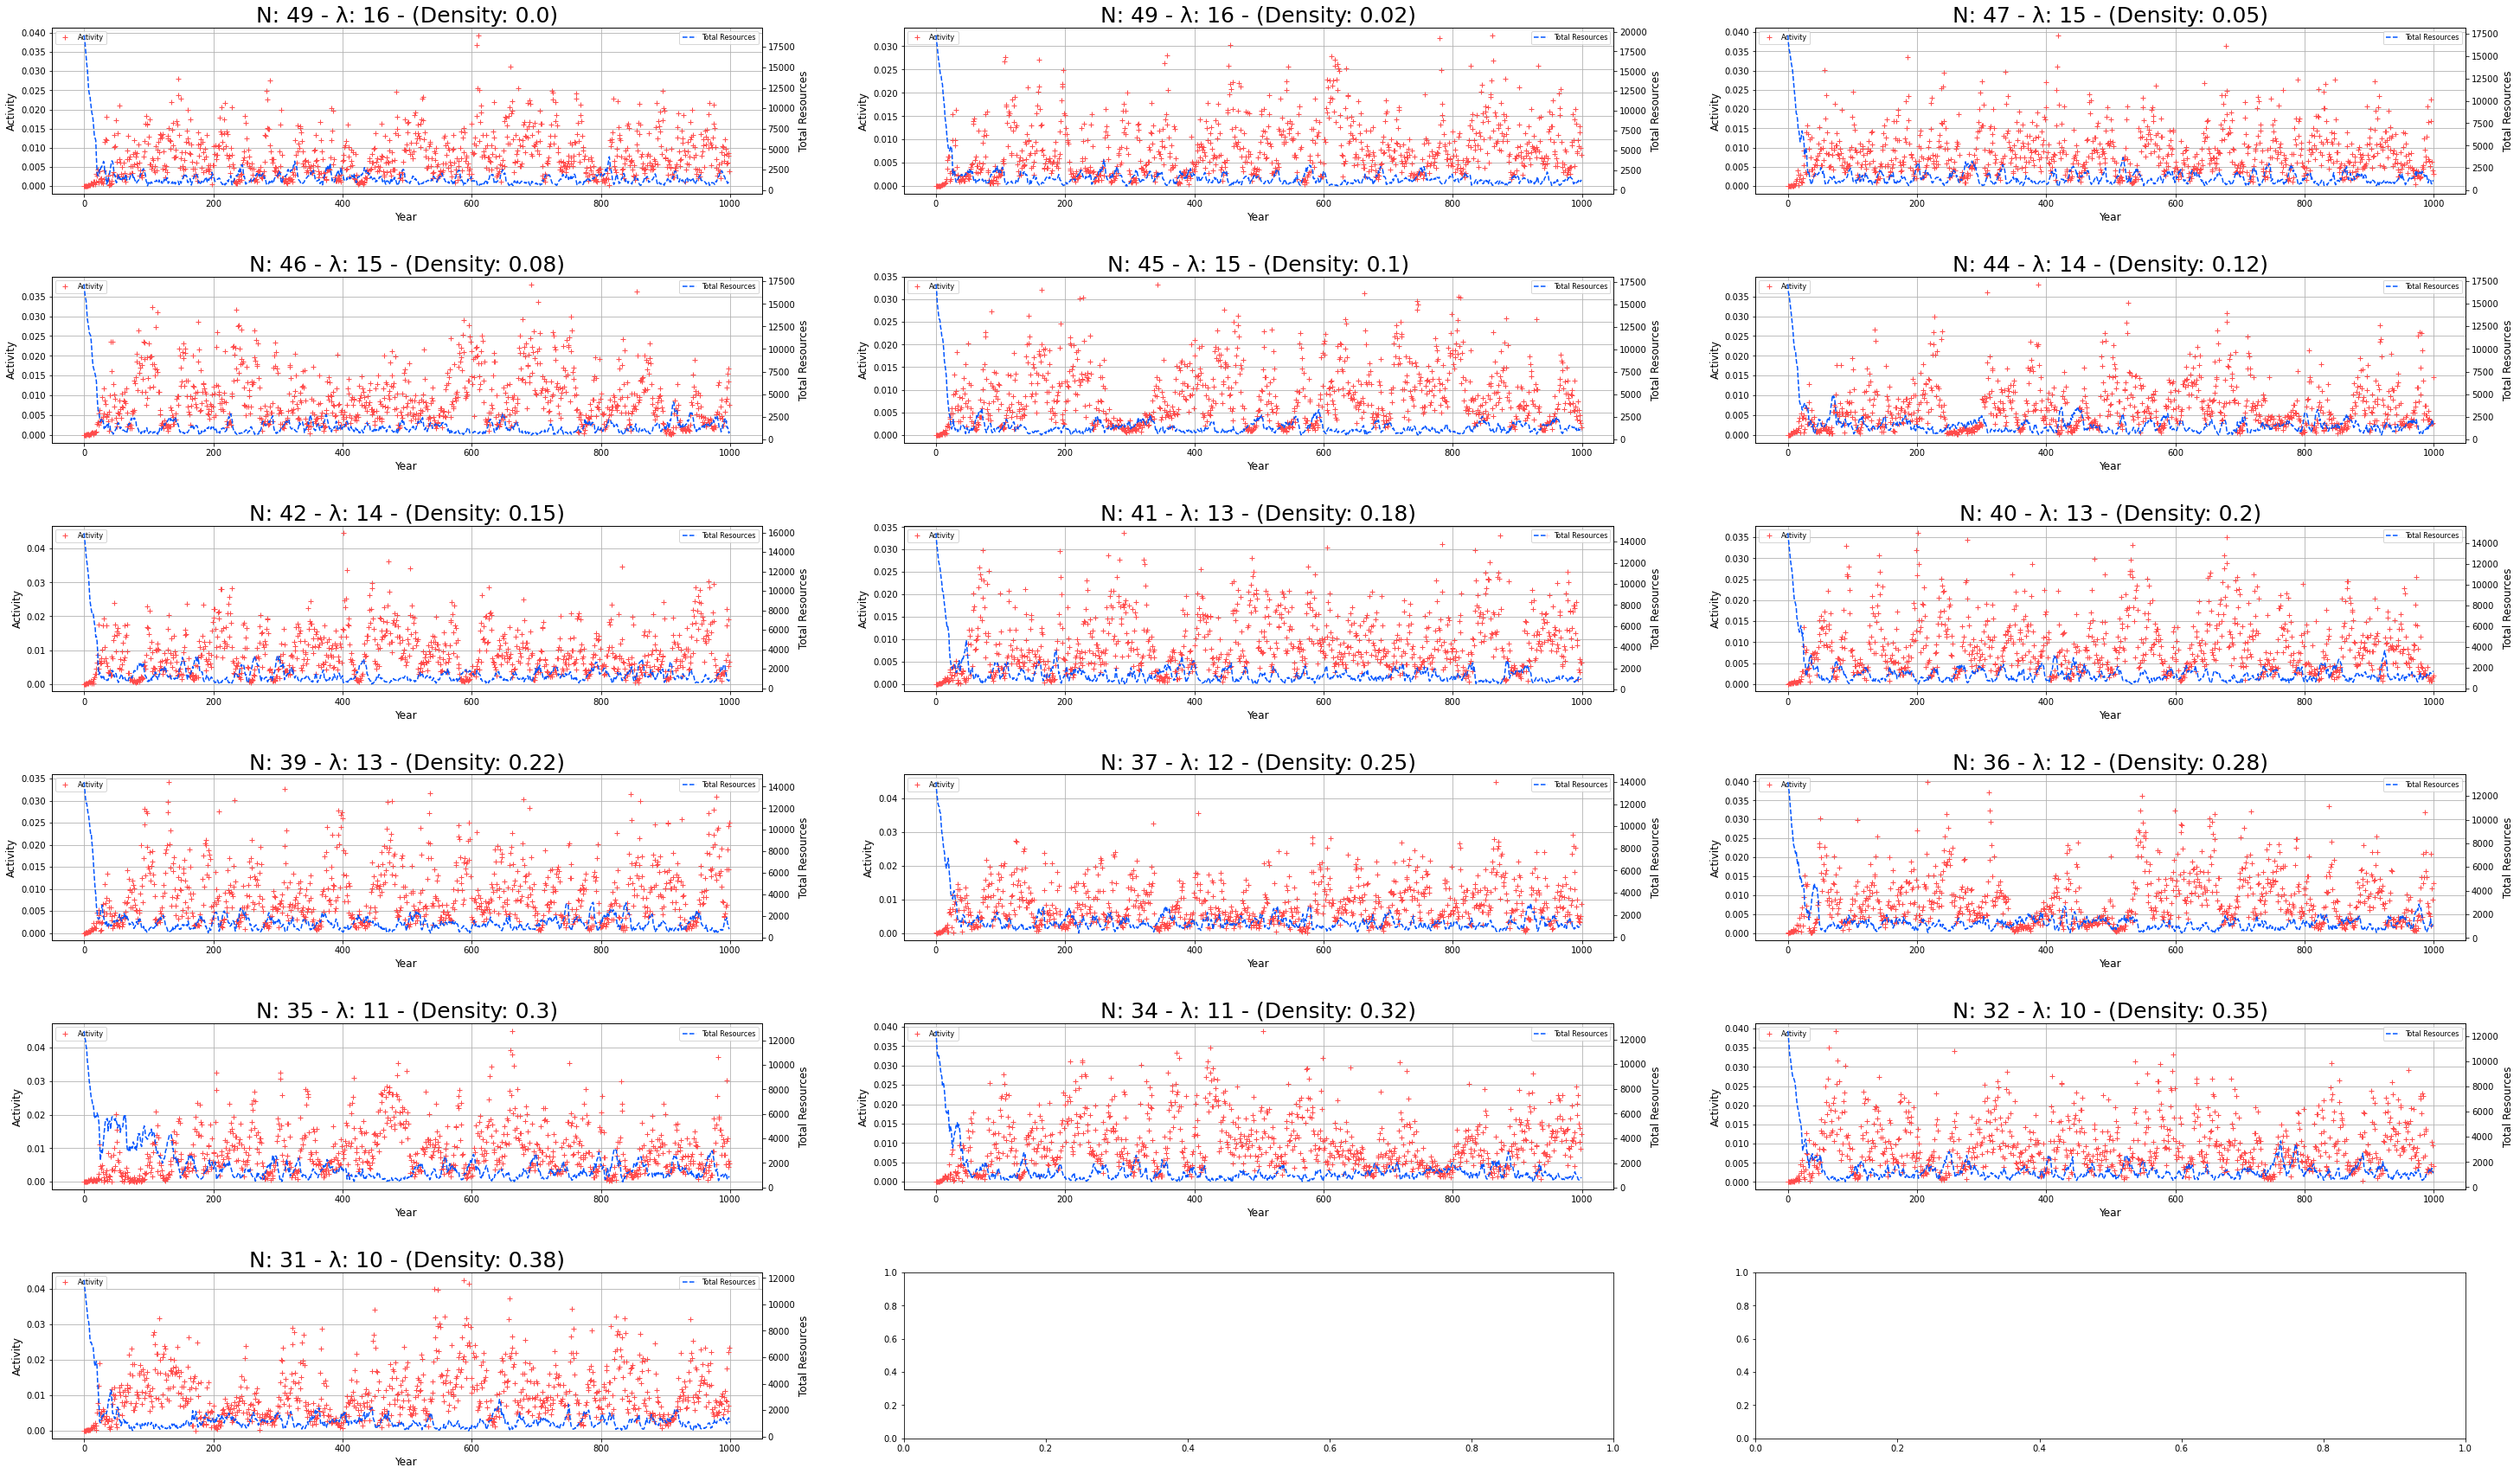

In [10]:
fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

for i, density in enumerate(interval1):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)

    total_resources = df.iloc[:, 8:].sum(axis=1)

    # Calculate N based on density
    N = L * L - int(density * L * L)

    x1 = np.arange(0, len(df), 1)
    years = range(x1[0] // (N // 3), (x1[-1] // (N // 3)) + 1)

    # Calculate df_grouped and df_grouped2
    df_grouped = df["Activity"].groupby((x1 // (N // 3))).mean()
    df_grouped2 = total_resources.groupby((x1 // (N // 3))).mean()
    
    bifurcation_points.extend(df_grouped.values[-100:])

    # Plot the data in the corresponding subplot
        # Determine the subplot position
    row = i // 3
    col = i % 3
    
    ax1 = axs[row, col]
    ax2 = ax1.twinx()

    ax1.set_ylabel("Activity", fontsize=12)
    ax2.set_ylabel("Total Resources", fontsize=12)
    ax1.set_xlabel("Year", fontsize=12)
    ax1.set_title(f"N: {N} - λ: {N // 3} - (Density: {density})", fontsize=25)

    ax1.tick_params(axis='both', labelsize=10)
    ax2.tick_params(axis='both', labelsize=10)

    ax1.plot(years, df_grouped, linestyle=" ", marker="+", color="#FF4C4C", label='Activity')
    ax2.plot(years, df_grouped2, linestyle="--", color="#0055FF", label='Total Resources')

    # Create the legend
    ax1.legend(loc='upper left', fontsize=8)
    ax2.legend(loc='upper right', fontsize=8)

    # Add parameter information as a text annotation
    #params_info = f"N: {N}\nλ: {N // 3}"
    #ax1.text(0.5, 0.95, params_info, transform=ax1.transAxes, fontsize=10, ha='center')

    ax1.grid(True)

plt.show()
plt.close()



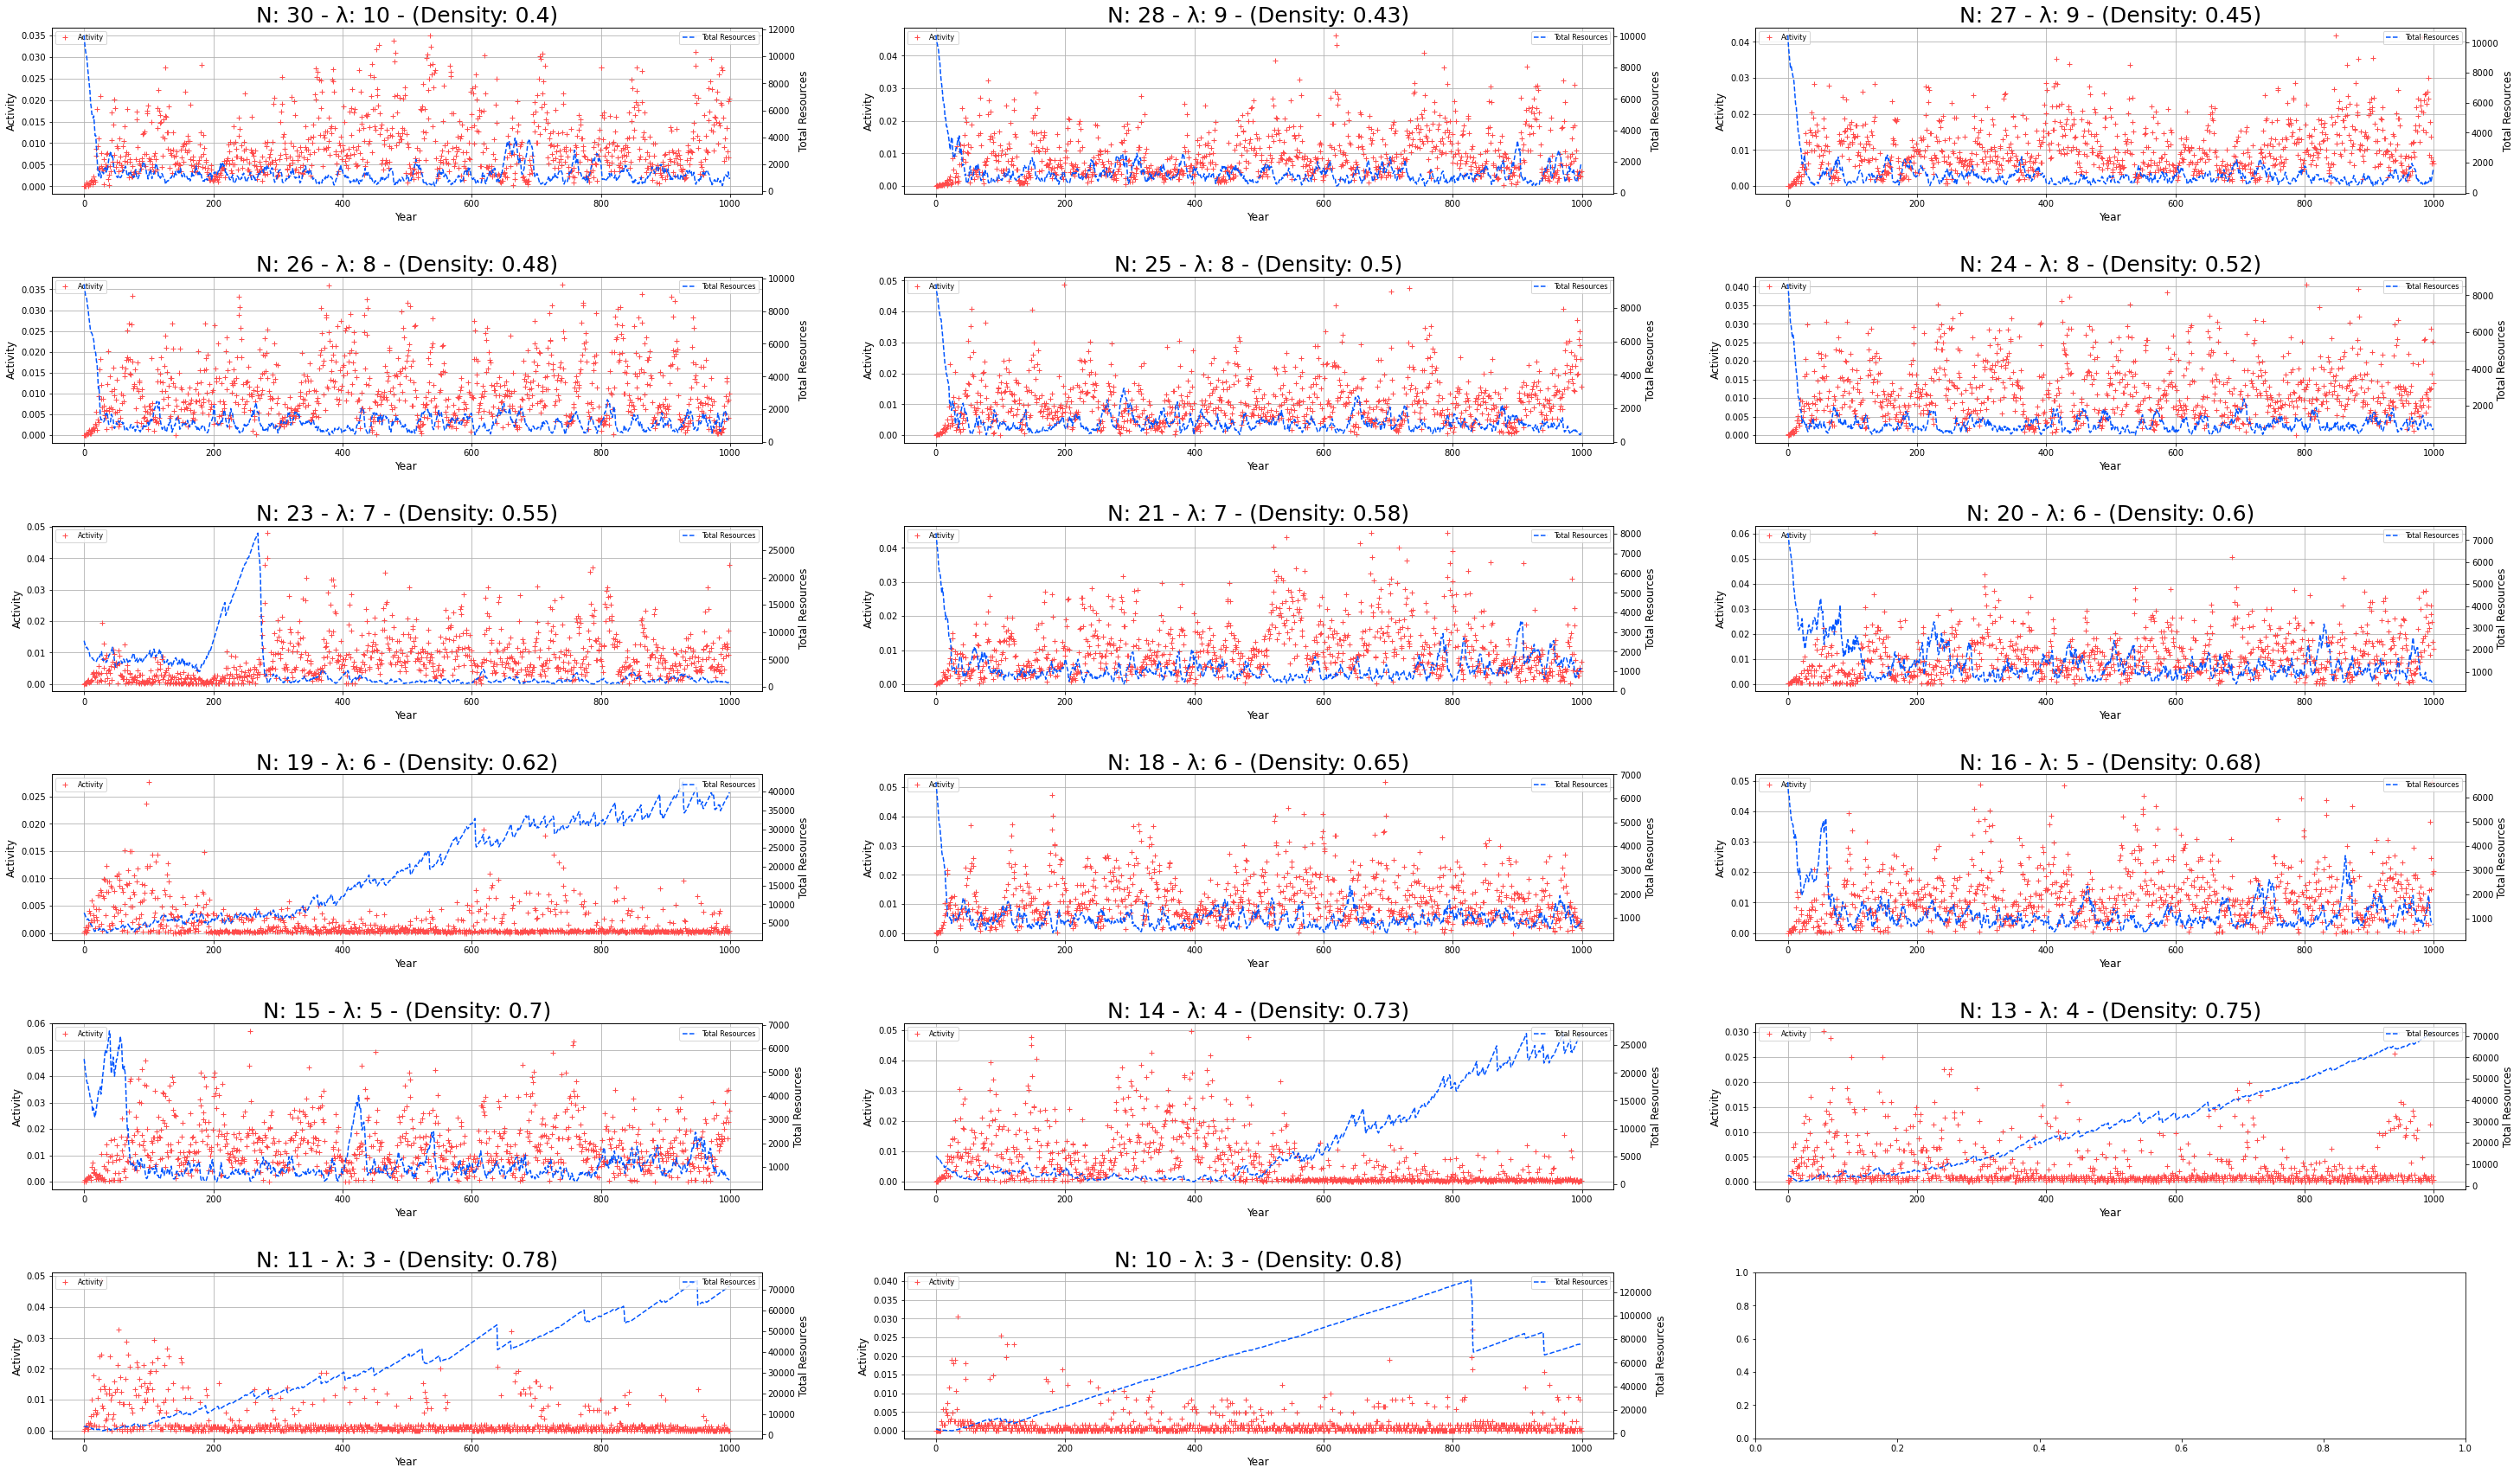

In [11]:
fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

for i, density in enumerate(interval2):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)

    total_resources = df.iloc[:, 8:].sum(axis=1)

    # Calculate N based on density
    N = L * L - int(density * L * L)

    x1 = np.arange(0, len(df), 1)
    years = range(x1[0] // (N // 3), (x1[-1] // (N // 3)) + 1)

    # Calculate df_grouped and df_grouped2
    df_grouped = df["Activity"].groupby((x1 // (N // 3))).mean()
    df_grouped2 = total_resources.groupby((x1 // (N // 3))).mean()
    
    bifurcation_points.extend(df_grouped.values[-100:])

    # Plot the data in the corresponding subplot
        # Determine the subplot position
    row = i // 3
    col = i % 3
    
    ax1 = axs[row, col]
    ax2 = ax1.twinx()

    ax1.set_ylabel("Activity", fontsize=12)
    ax2.set_ylabel("Total Resources", fontsize=12)
    ax1.set_xlabel("Year", fontsize=12)
    ax1.set_title(f"N: {N} - λ: {N // 3} - (Density: {density})", fontsize=25)

    ax1.tick_params(axis='both', labelsize=10)
    ax2.tick_params(axis='both', labelsize=10)

    ax1.plot(years, df_grouped, linestyle=" ", marker="+", color="#FF4C4C", label='Activity')
    ax2.plot(years, df_grouped2, linestyle="--", color="#0055FF", label='Total Resources')

    # Create the legend
    ax1.legend(loc='upper left', fontsize=8)
    ax2.legend(loc='upper right', fontsize=8)

    # Add parameter information as a text annotation
    #params_info = f"N: {N}\nλ: {N // 3}"
    #ax1.text(0.5, 0.95, params_info, transform=ax1.transAxes, fontsize=10, ha='center')

    ax1.grid(True)

plt.show()
plt.close()


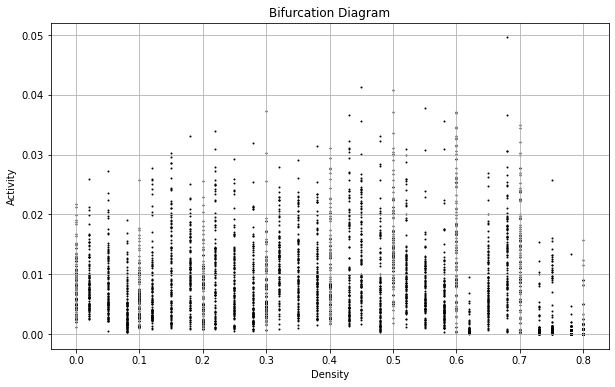

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure

plt.scatter(interval.repeat(100), bifurcation_points, s=1, c='black')
plt.xlabel("Density")
plt.ylabel("Activity")
plt.title("Bifurcation Diagram")
plt.grid(True)  # Apply grid lines

plt.show()


## Conflict Sizes

### Defence coalition ($\tau$)

C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\108309581.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\108309581.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\108309581.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

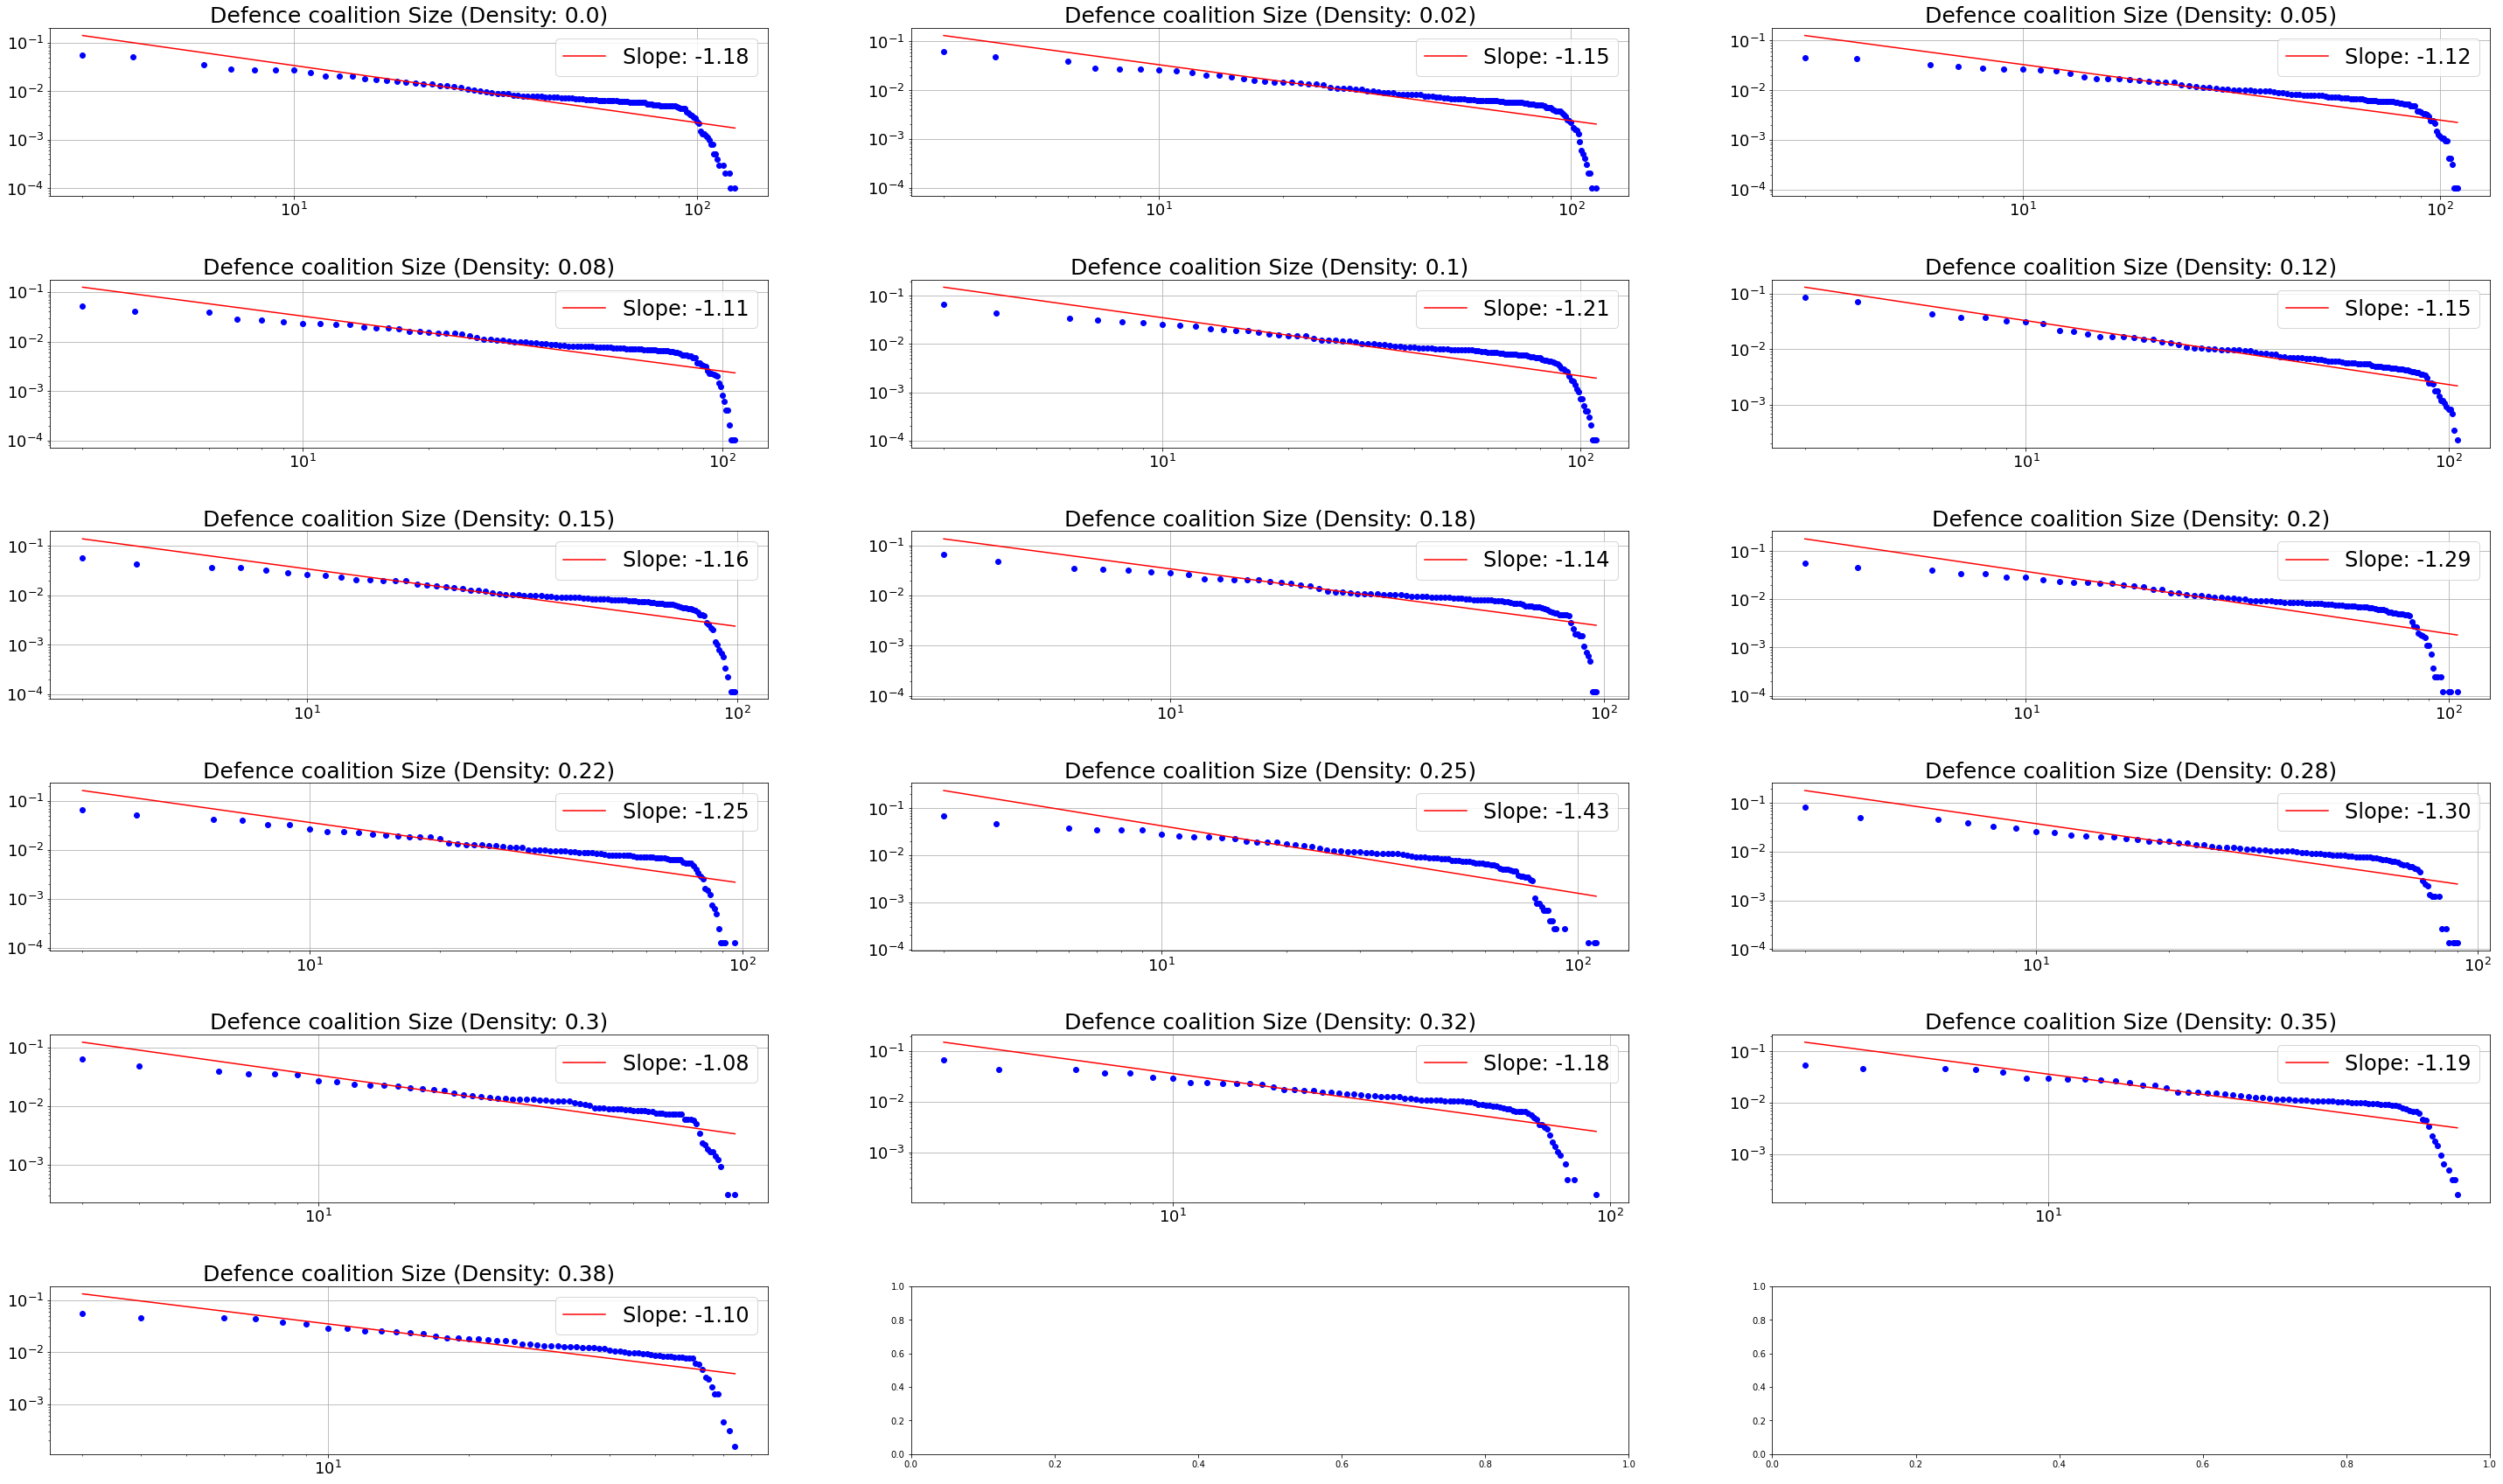

In [13]:
slope_list = []

fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

for i, density in enumerate(interval1):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    
    filtered_df = df[df["Status"] == 1]
    filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
    
    # Extract the values of "Tau" from the filtered dataframe
    tau_values = filtered_df['Defenders_length']

    # Count the occurrences of each value in the DataFrame column
    value_counts = tau_values.value_counts()
    
    # Calculate the probability distribution
    prob_distribution = value_counts / len(tau_values)

    # Sort the values in ascending order
    sorted_values = np.sort(value_counts.index)

    # Select the current subplot
    ax = axs[i // 3, i % 3]
    
    # Plot the probability distribution on a log-log scale
    ax.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

    # Perform log-log transformation
    log_sorted_values = np.log(sorted_values)
    log_prob_distribution = np.log(prob_distribution)

    # Perform linear regression to estimate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)
    
    slope_list.append(slope)
    # Create the line that represents the best fit
    line = slope * log_sorted_values + intercept

    # Plot the line on the log-log plot
    ax.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

    # Increase the font size of the axis labels and tick labels
    #ax.set_xlabel(r"Participants - $\tau$", fontsize=25)
    #ax.set_ylabel(r"Probability $P(\tau)$", fontsize=25)
    ax.set_title(f"Defence coalition Size (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


    # Increase the font size of the tick labels
    ax.tick_params(axis='both', labelsize=18)

    ax.legend(fontsize=24)

    ax.grid(True)
plt.show()


C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\2023998414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\2023998414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\2023998414.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

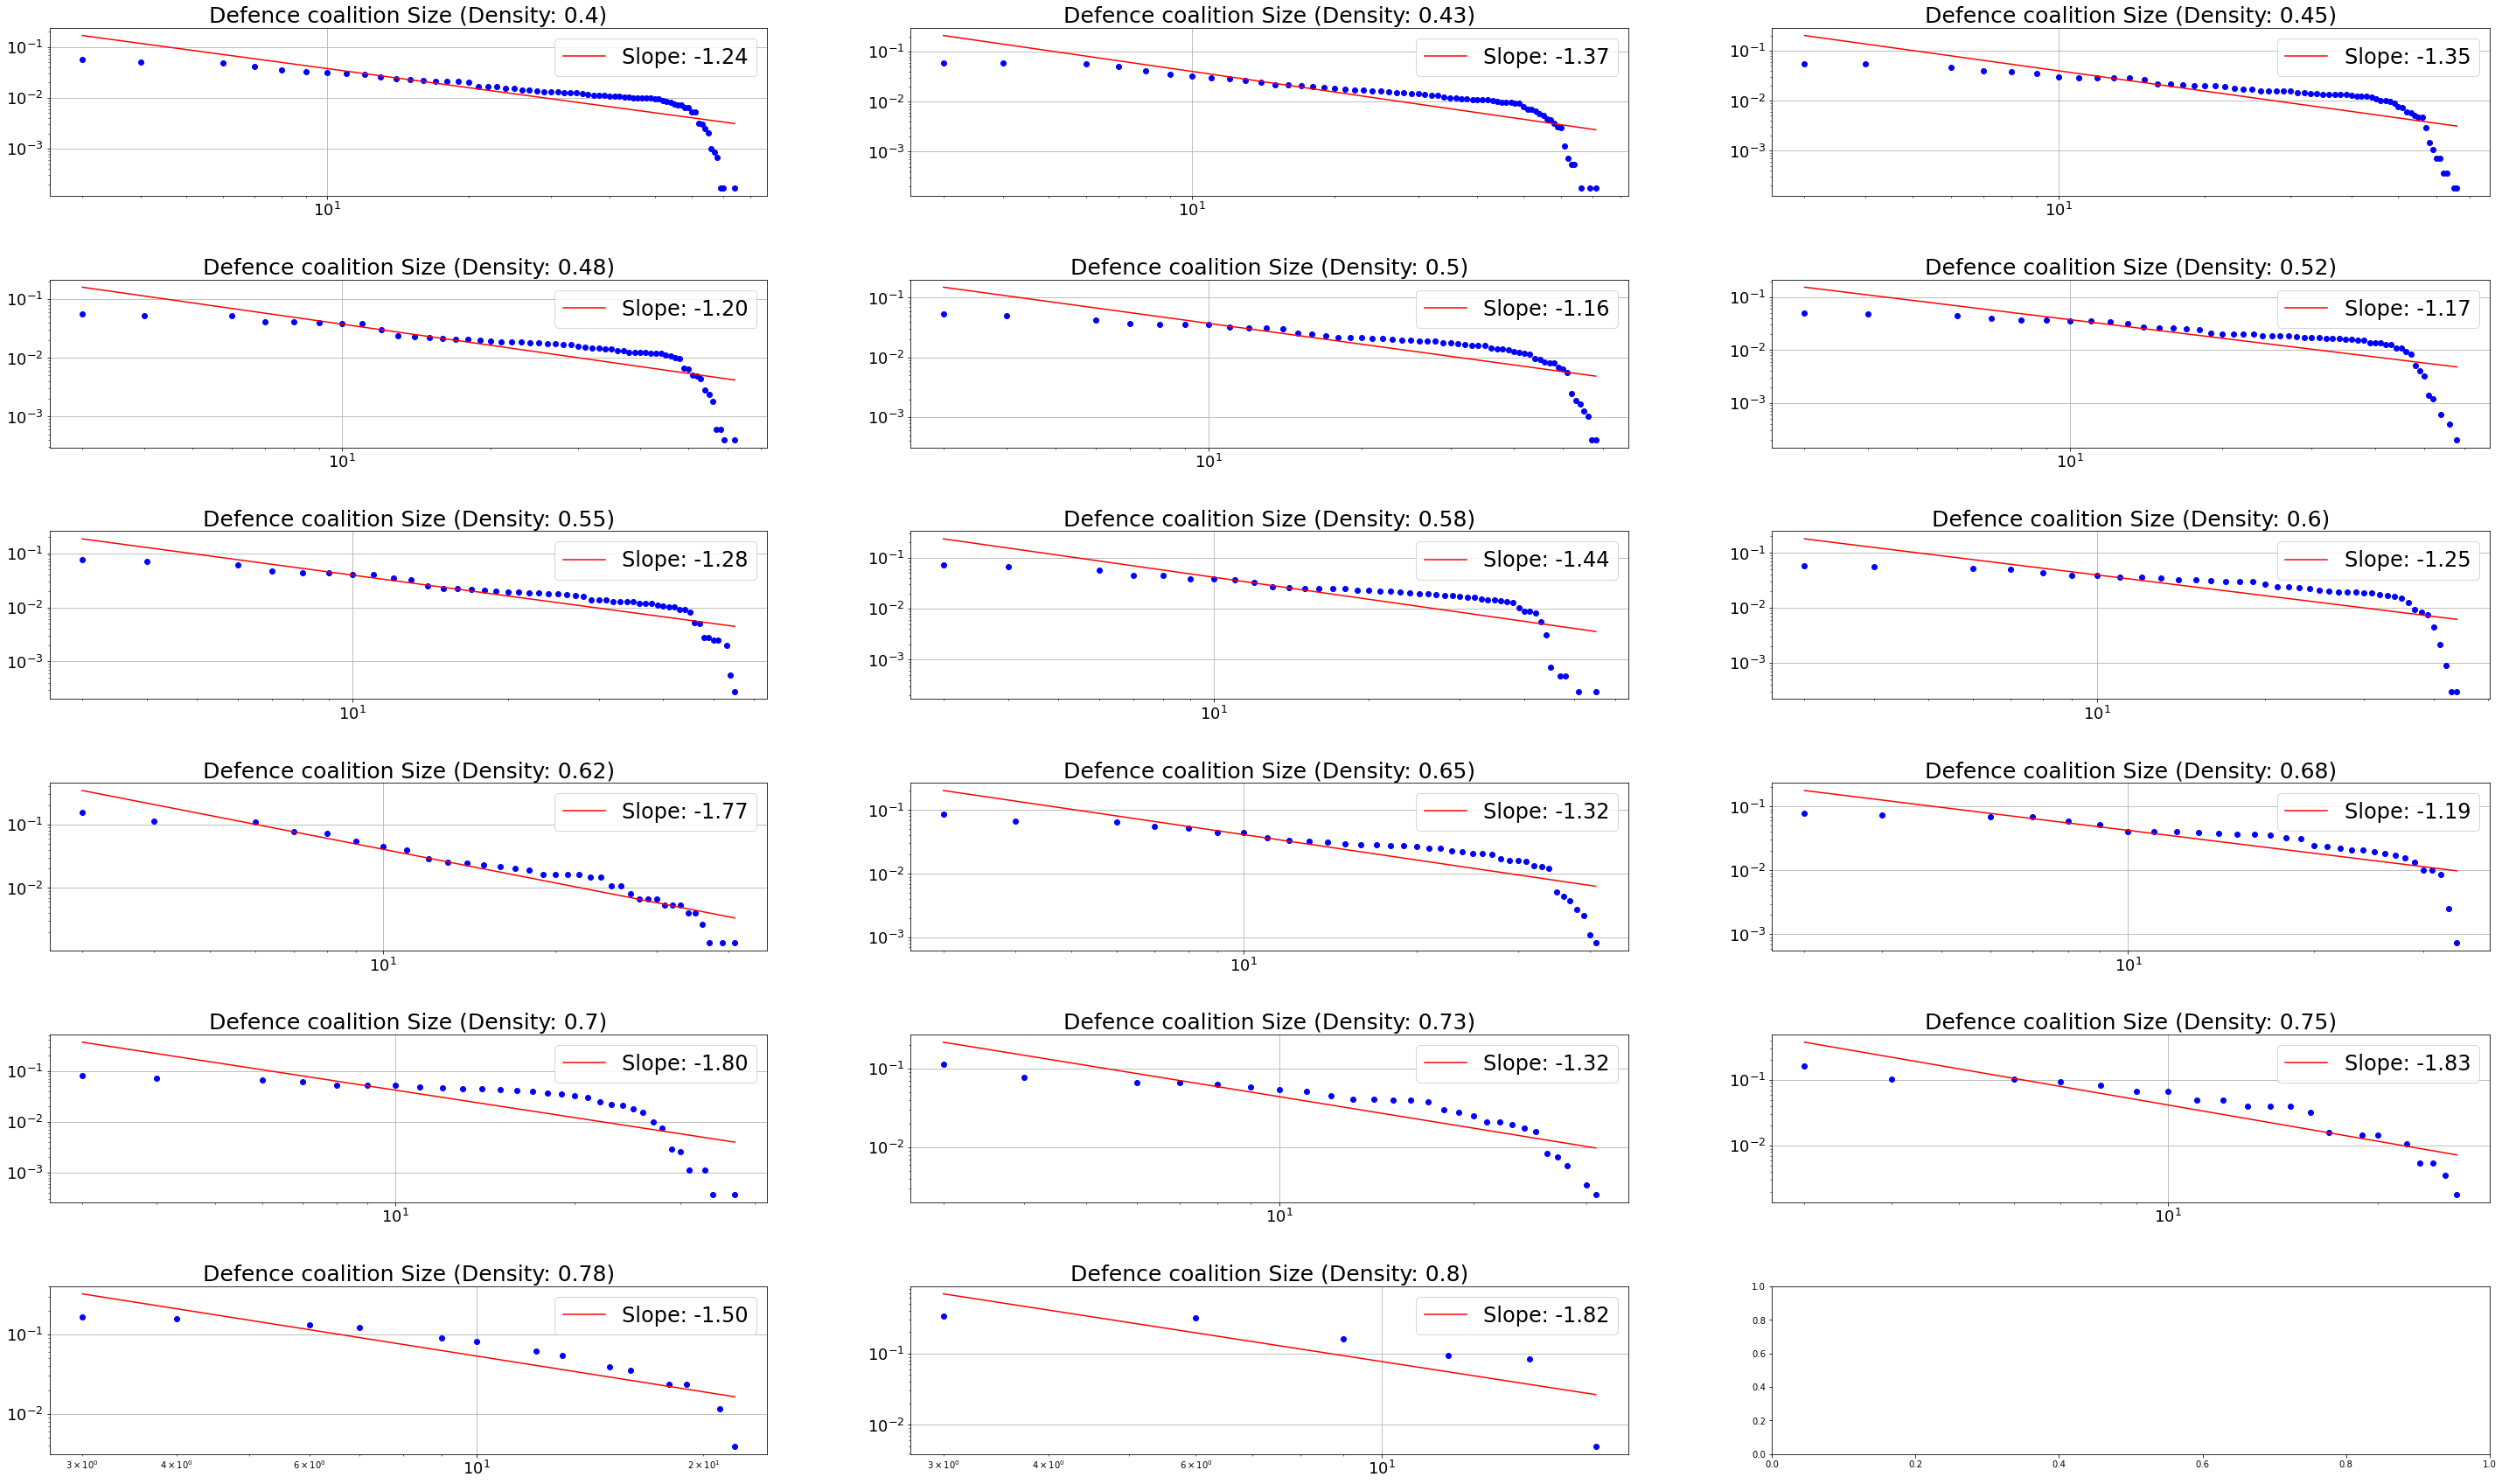

In [14]:

fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

for i, density in enumerate(interval2):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    
    filtered_df = df[df["Status"] == 1]
    filtered_df.loc[:, 'Defenders_length'] = filtered_df['Defenders'].apply(len)
    
    # Extract the values of "Tau" from the filtered dataframe
    tau_values = filtered_df['Defenders_length']

    # Count the occurrences of each value in the DataFrame column
    value_counts = tau_values.value_counts()
    
    # Calculate the probability distribution
    prob_distribution = value_counts / len(tau_values)

    # Sort the values in ascending order
    sorted_values = np.sort(value_counts.index)

    # Select the current subplot
    ax = axs[i // 3, i % 3]
    
    # Plot the probability distribution on a log-log scale
    ax.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

    # Perform log-log transformation
    log_sorted_values = np.log(sorted_values)
    log_prob_distribution = np.log(prob_distribution)

    # Perform linear regression to estimate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)
    
    slope_list.append(slope)
    # Create the line that represents the best fit
    line = slope * log_sorted_values + intercept

    # Plot the line on the log-log plot
    ax.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

    # Increase the font size of the axis labels and tick labels
    #ax.set_xlabel(r"Participants - $\tau$", fontsize=25)
    #ax.set_ylabel(r"Probability $P(\tau)$", fontsize=25)
    ax.set_title(f"Defence coalition Size (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


    # Increase the font size of the tick labels
    ax.tick_params(axis='both', labelsize=18)

    ax.legend(fontsize=24)

    ax.grid(True)
plt.show()

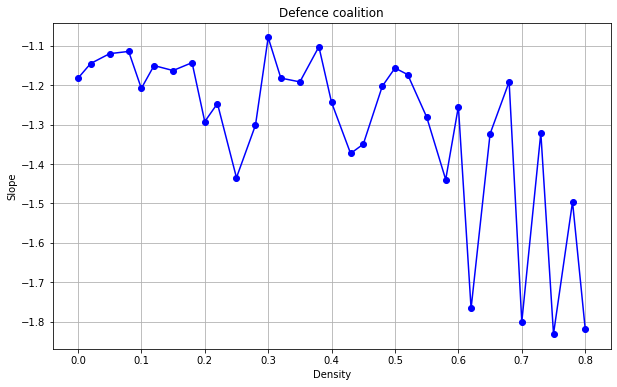

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure

plt.plot(interval, slope_list, marker='o', linestyle='-', color='blue')

plt.xlabel('Density')
plt.ylabel('Slope')
plt.title('Defence coalition')
plt.grid(True)
plt.show()



### Attack coalition ($\alpha$)

C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\4265977371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\4265977371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\4265977371.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of

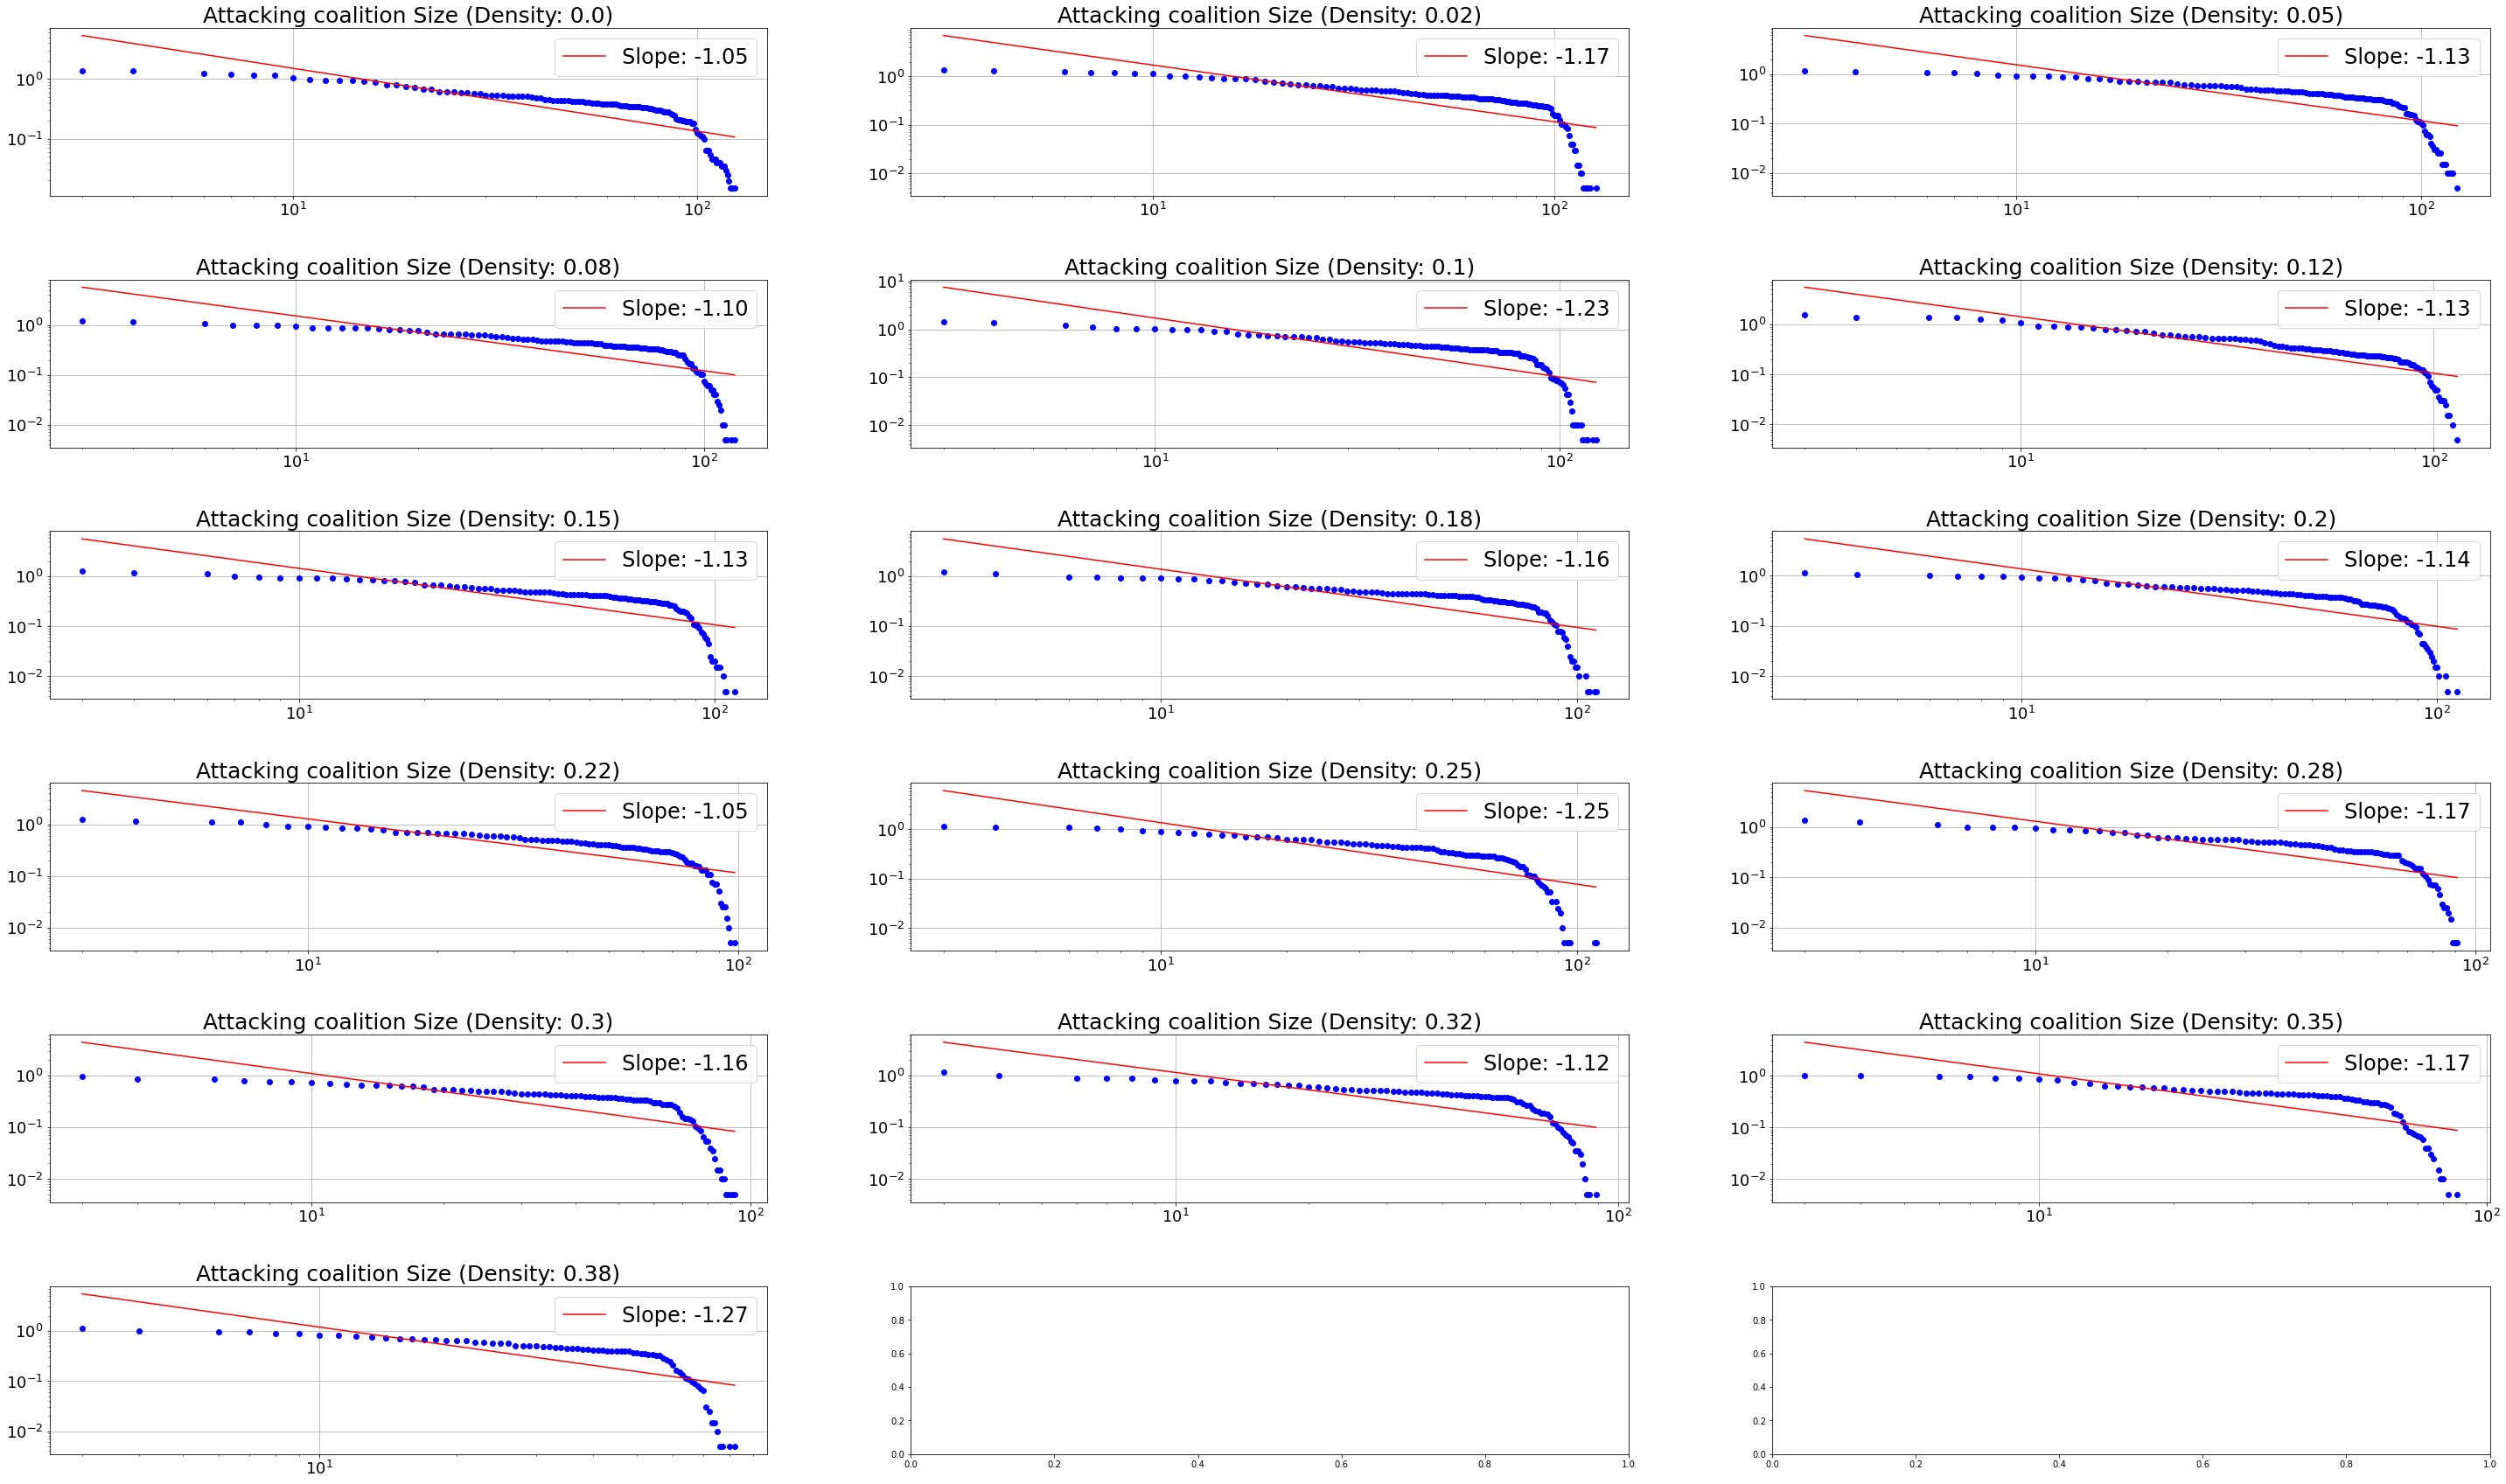

In [16]:
slope_list = []

fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)


for i, density in enumerate(interval1):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    
    filtered_df = df[df["Status"] == 1]
    filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
    
    # Extract the values of "Tau" from the filtered dataframe
    alpha_values = filtered_df['Attackers_length']

    # Count the occurrences of each value in the DataFrame column
    value_counts = alpha_values.value_counts()
    
    # Calculate the probability distribution
    prob_distribution = value_counts / len(tau_values)

    # Sort the values in ascending order
    sorted_values = np.sort(value_counts.index)

    # Select the current subplot
    ax = axs[i // 3, i % 3]
    
    # Plot the probability distribution on a log-log scale
    ax.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

    # Perform log-log transformation
    log_sorted_values = np.log(sorted_values)
    log_prob_distribution = np.log(prob_distribution)

    # Perform linear regression to estimate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)
     
    slope_list.append(slope)    
    # Create the line that represents the best fit
    line = slope * log_sorted_values + intercept

    # Plot the line on the log-log plot
    ax.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

    # Increase the font size of the axis labels and tick labels
    #ax.set_xlabel(r"Participants - $\alpha$", fontsize=25)
    #ax.set_ylabel(r"Probability $P(\alpha)$", fontsize=25)
    ax.set_title(f"Attacking coalition Size (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


    # Increase the font size of the tick labels
    ax.tick_params(axis='both', labelsize=18)

    ax.legend(fontsize=24)

    ax.grid(True)
plt.show()

C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\1725530319.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\1725530319.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
C:\Users\bradm\AppData\Local\Temp\ipykernel_8832\1725530319.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

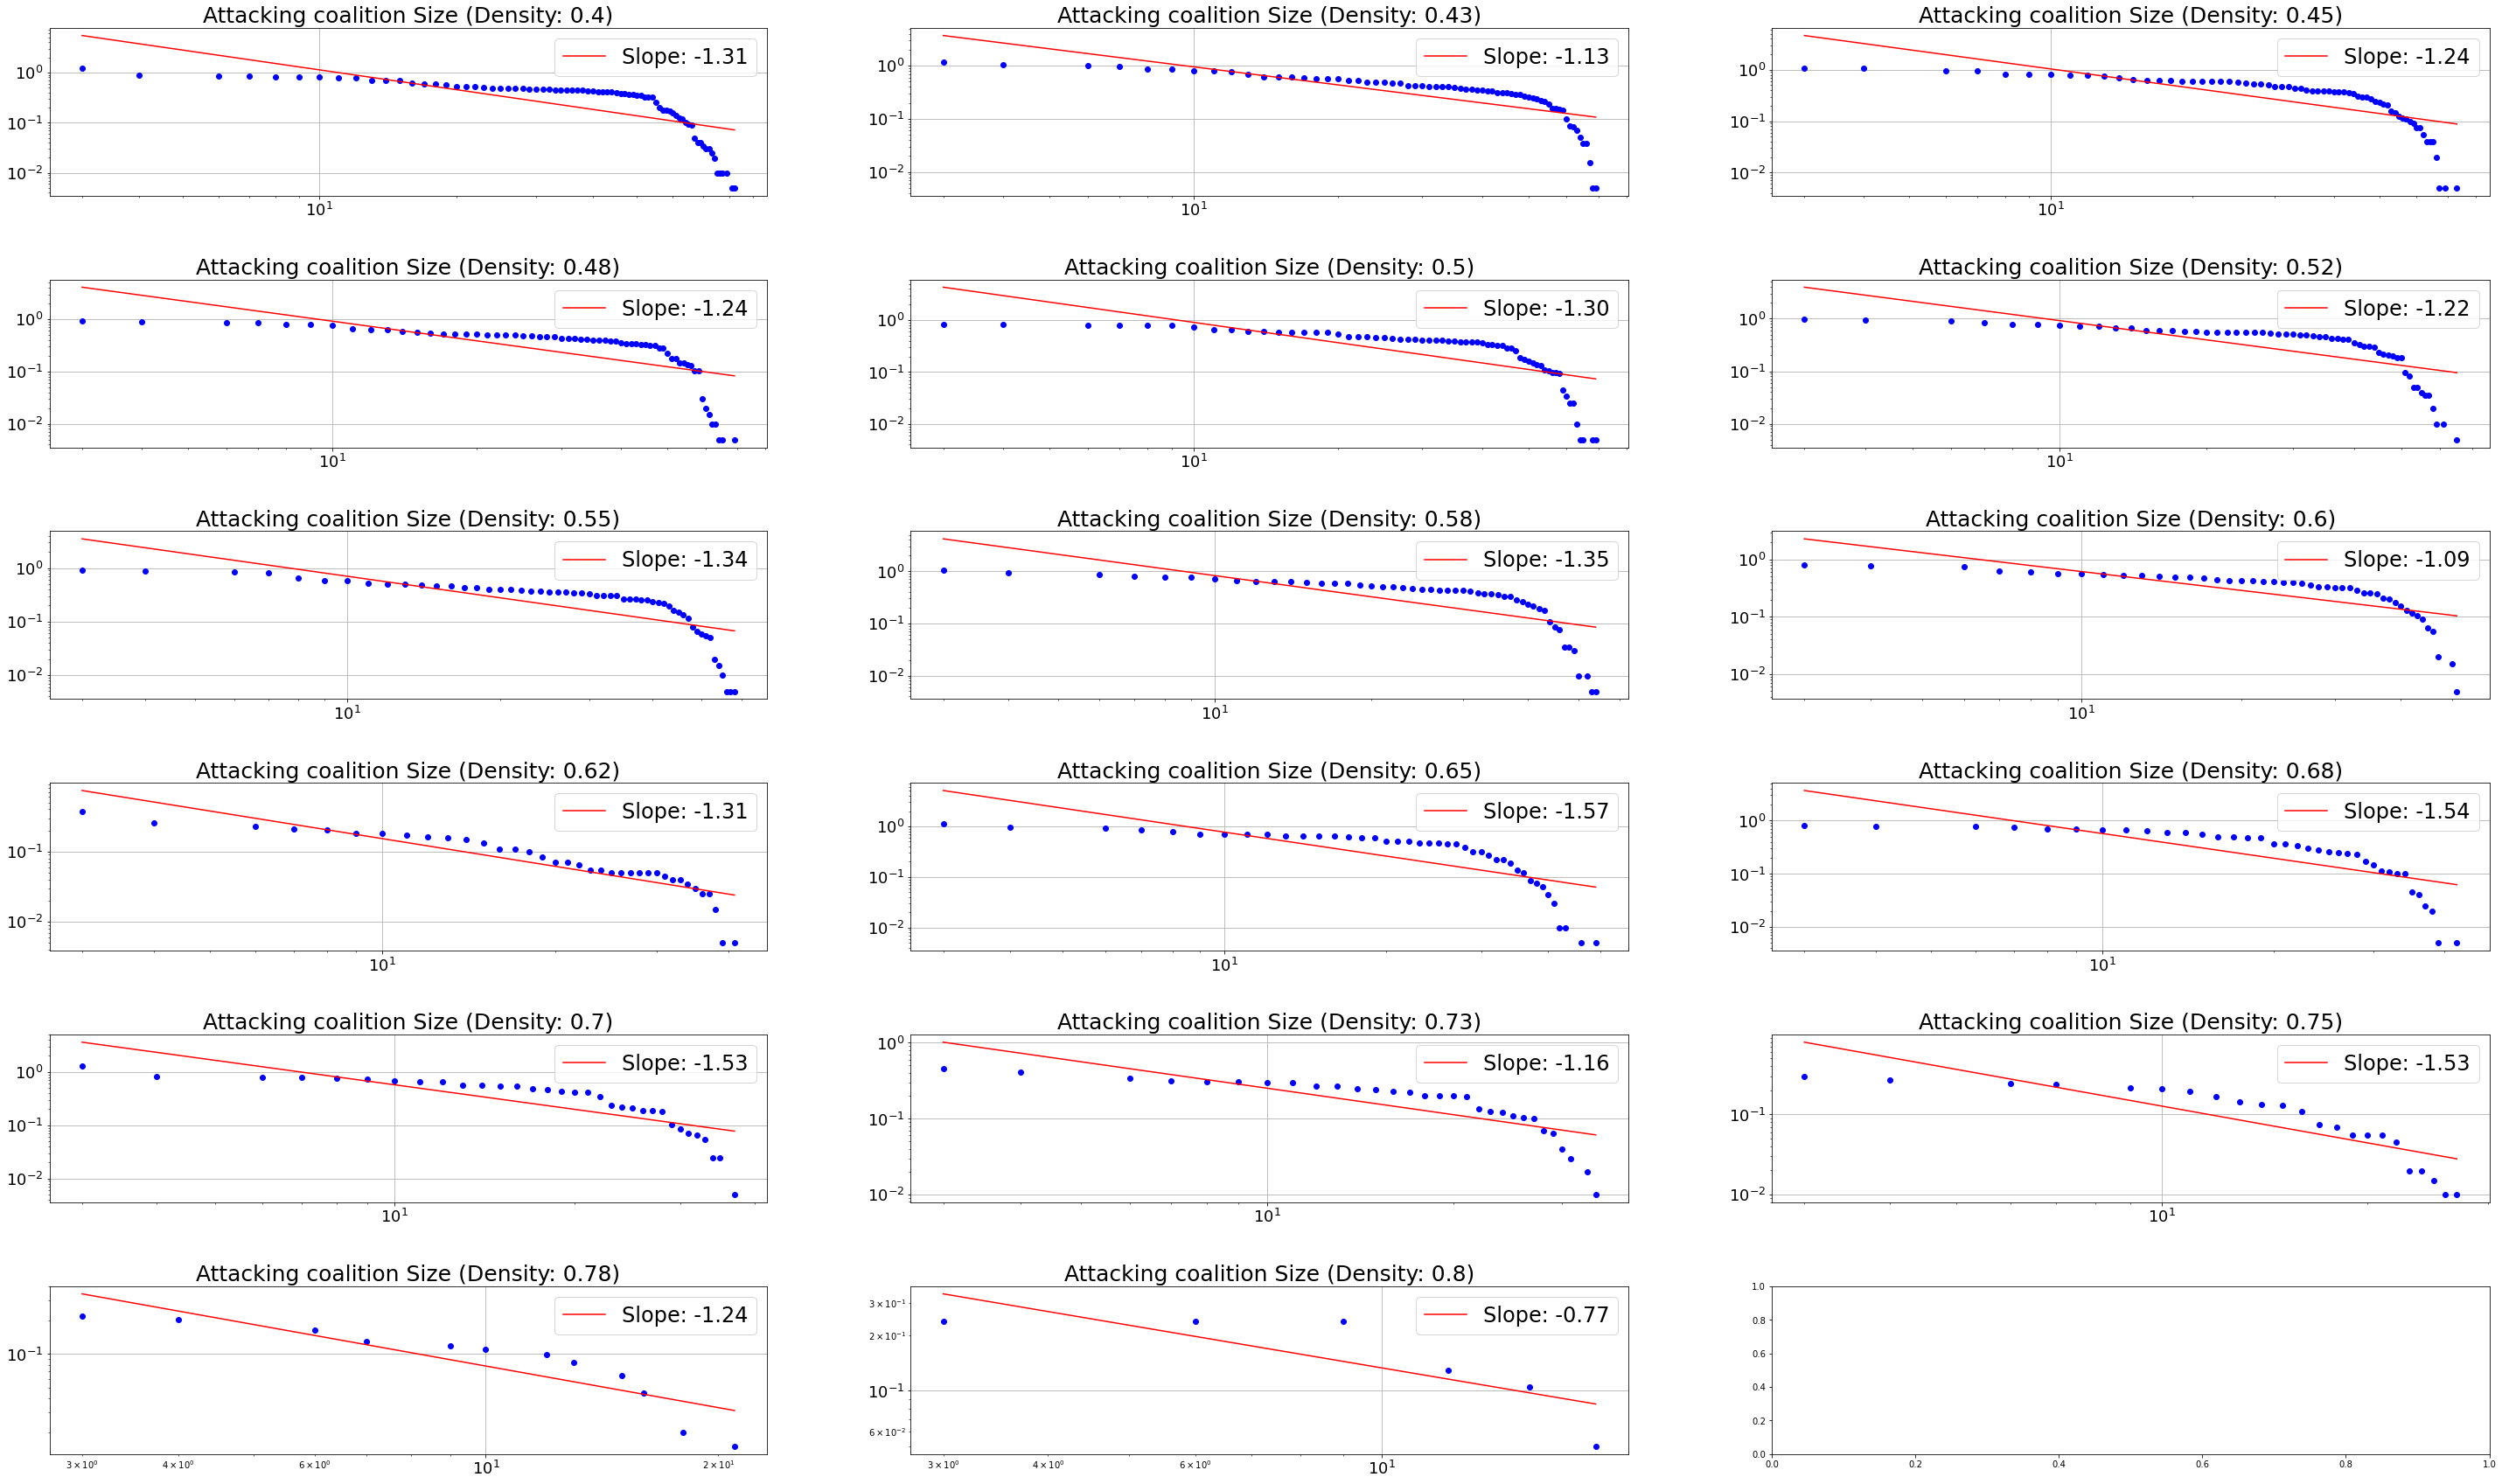

In [17]:
fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)


for i, density in enumerate(interval2):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    
    filtered_df = df[df["Status"] == 1]
    filtered_df.loc[:, 'Attackers_length'] = filtered_df['Attackers'].apply(len)
    
    # Extract the values of "Tau" from the filtered dataframe
    alpha_values = filtered_df['Attackers_length']

    # Count the occurrences of each value in the DataFrame column
    value_counts = alpha_values.value_counts()
    
    # Calculate the probability distribution
    prob_distribution = value_counts / len(tau_values)

    # Sort the values in ascending order
    sorted_values = np.sort(value_counts.index)

    # Select the current subplot
    ax = axs[i // 3, i % 3]
    
    # Plot the probability distribution on a log-log scale
    ax.loglog(sorted_values, prob_distribution, marker='o', linestyle='', color='blue')

    # Perform log-log transformation
    log_sorted_values = np.log(sorted_values)
    log_prob_distribution = np.log(prob_distribution)

    # Perform linear regression to estimate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_sorted_values, log_prob_distribution)
     
    slope_list.append(slope)    
    # Create the line that represents the best fit
    line = slope * log_sorted_values + intercept

    # Plot the line on the log-log plot
    ax.loglog(sorted_values, np.exp(line), color='red', label=f'Slope: {slope:.2f}')

    # Increase the font size of the axis labels and tick labels
    #ax.set_xlabel(r"Participants - $\alpha$", fontsize=25)
    #ax.set_ylabel(r"Probability $P(\alpha)$", fontsize=25)
    ax.set_title(f"Attacking coalition Size (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))


    # Increase the font size of the tick labels
    ax.tick_params(axis='both', labelsize=18)

    ax.legend(fontsize=24)

    ax.grid(True)
plt.show()

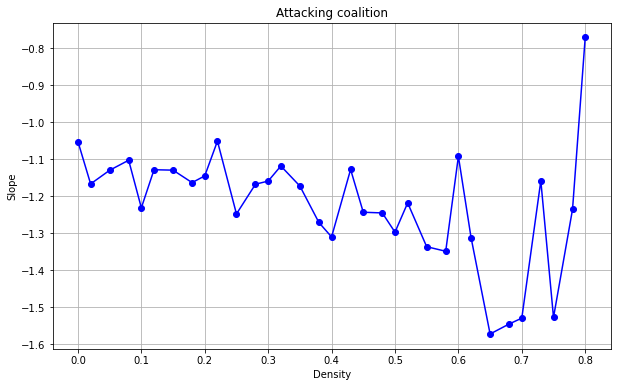

In [18]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
plt.plot(interval, slope_list, marker='o', linestyle='-', color='blue')

plt.xlabel('Density')
plt.ylabel('Slope')
plt.title('Attacking coalition')
plt.grid(True)
plt.show()

# Periods of peace

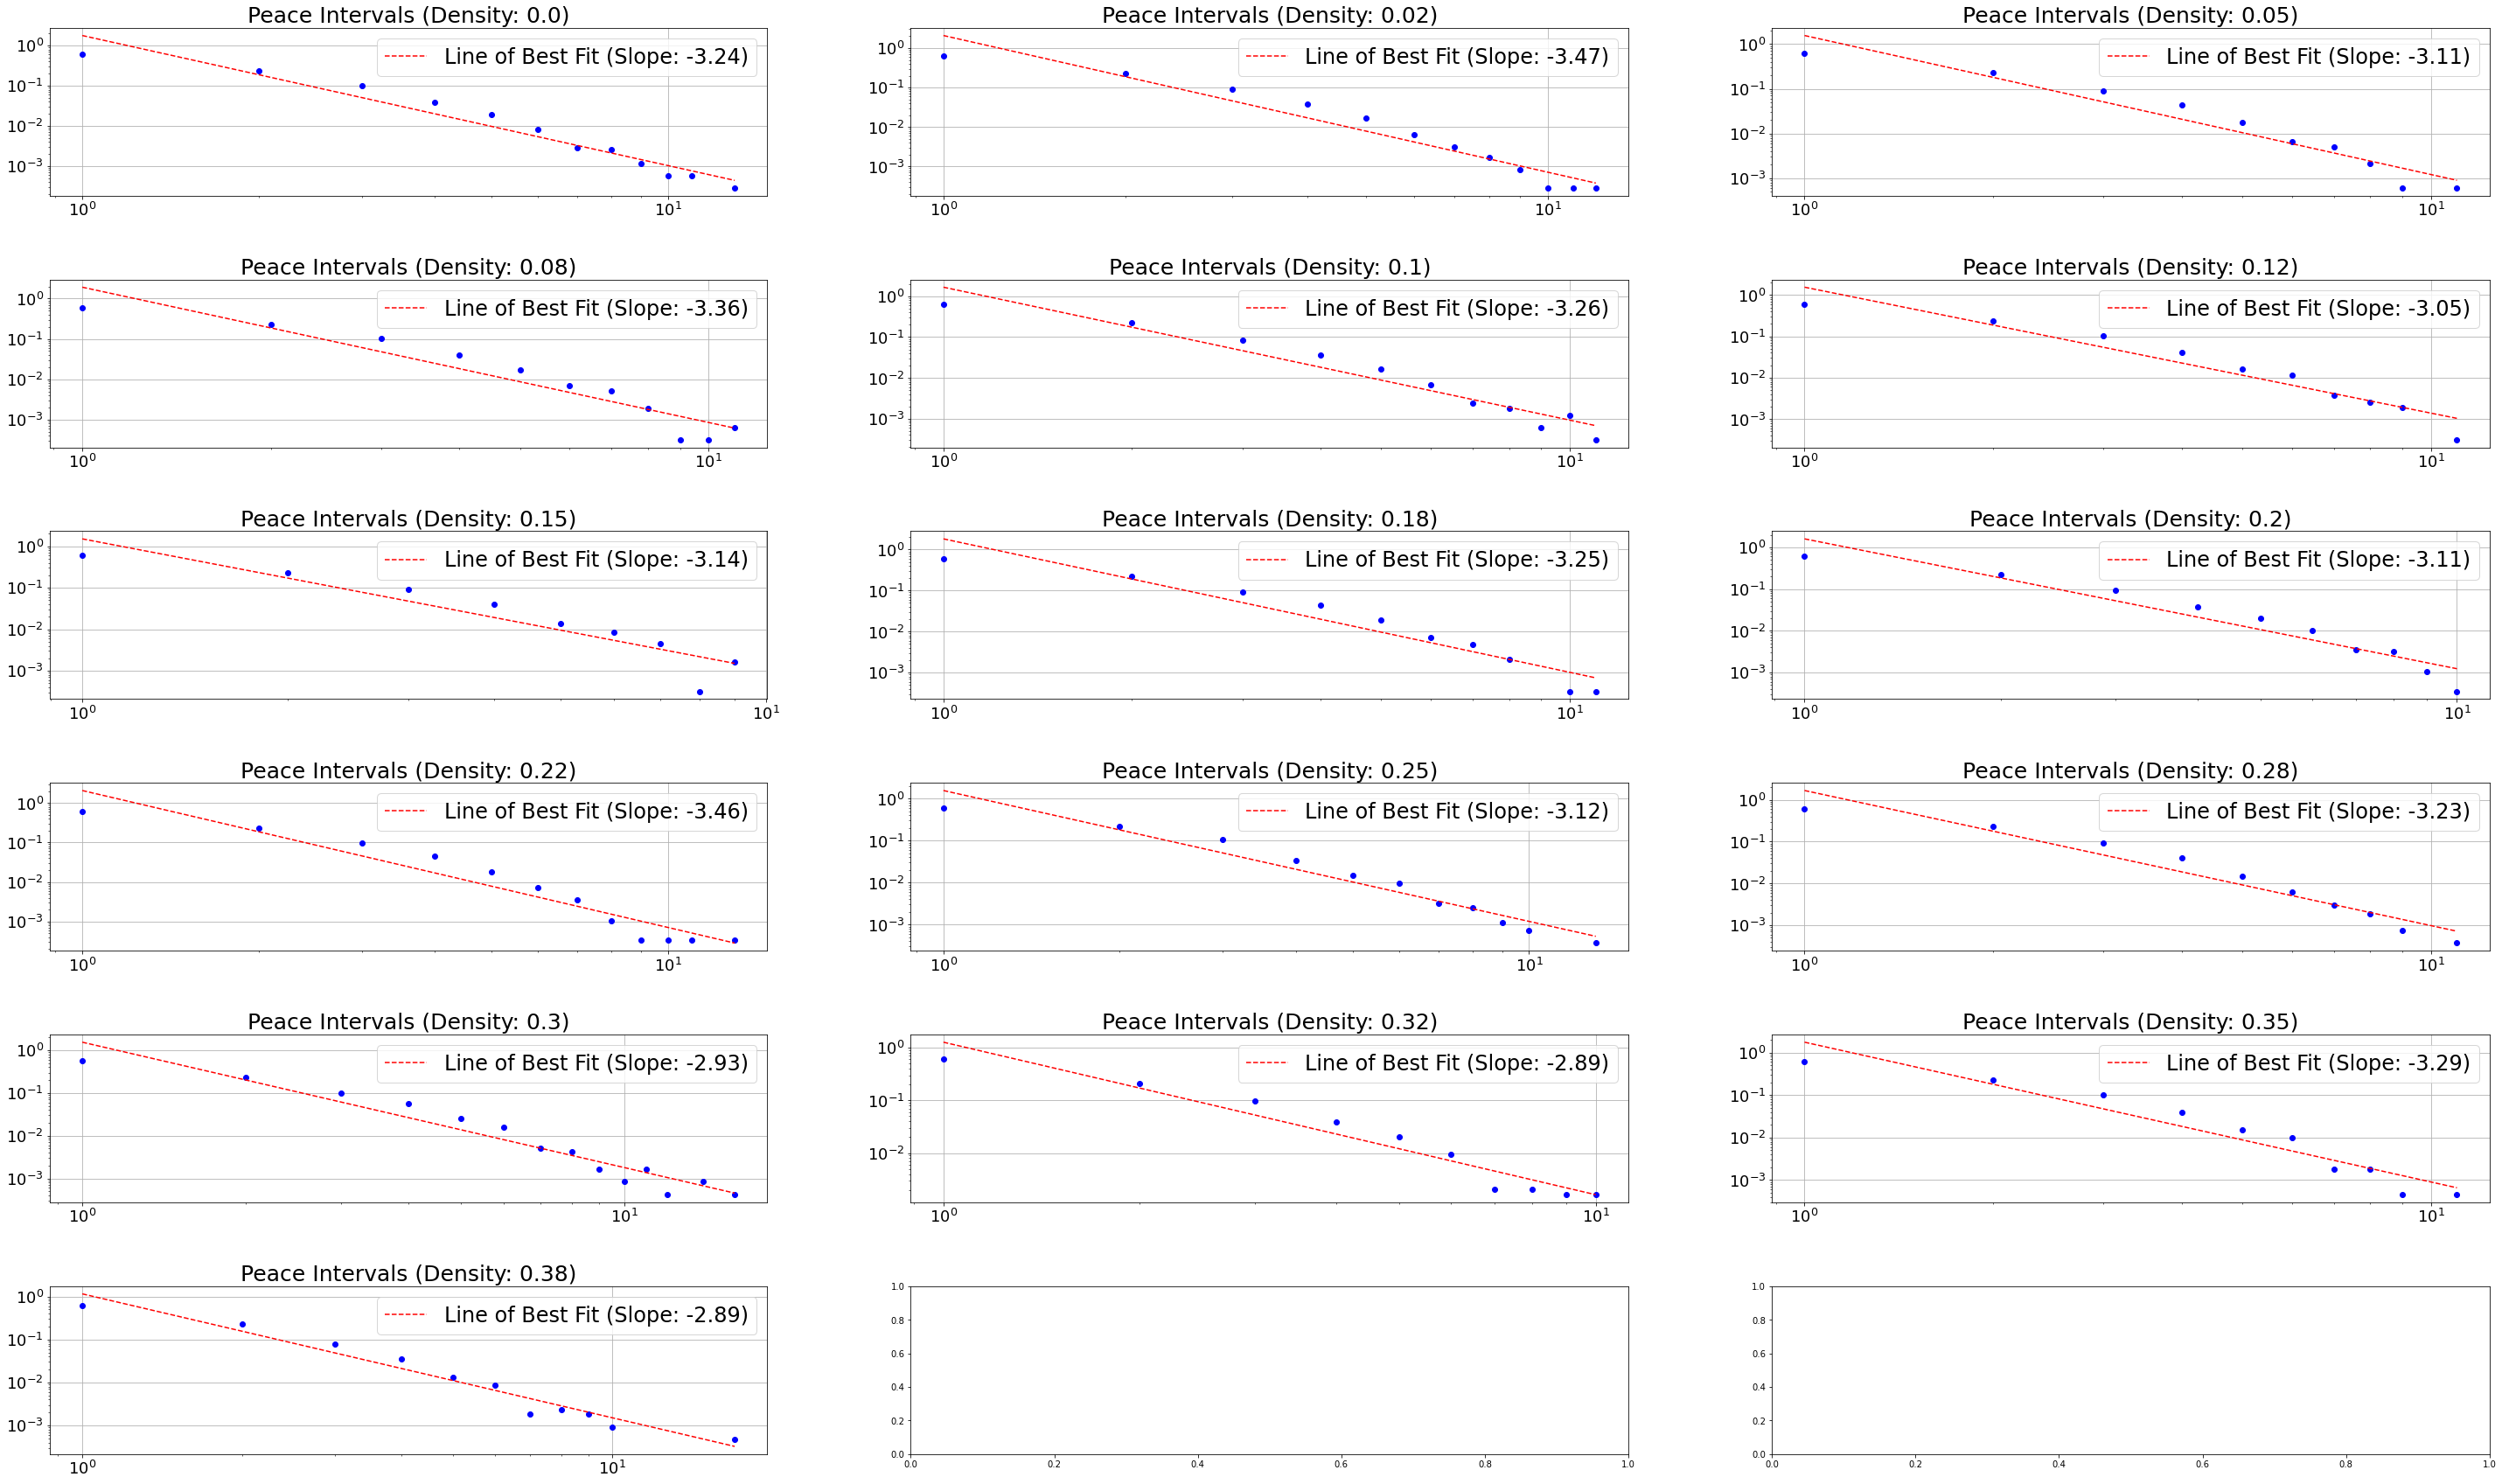

In [19]:
fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

slope_list = []
for i, density in enumerate(interval1):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    peace = df[df["Status"] != 1].groupby((df["Status"] == 1).cumsum()).size().tolist()

    # Calculate the unique values and their respective frequencies
    unique_values, frequencies = np.unique(peace, return_counts=True)

    # Calculate the total number of data points
    total_data_points = len(peace)

    # Calculate the probability frequencies
    prob_frequencies = frequencies / total_data_points
    # Select the current subplot
    ax = axs[i // 3, i % 3]

    # Plot the probability frequency on a log-log scale
    ax.loglog(unique_values, prob_frequencies, marker='o', linestyle='', color='blue')

    # Perform linear regression to find the line that fits the data
    x = np.log10(unique_values).reshape(-1, 1)
    y = np.log10(prob_frequencies)
    reg = LinearRegression().fit(x, y)
    
    slope_list.append(reg.coef_[0])

    # Plot the line that fits the data
    ax.loglog(unique_values, 10 ** reg.predict(x), color='red', linestyle='--',
               label=f"Line of Best Fit (Slope: {reg.coef_[0]:.2f})")

    # Set the labels and title of the plot
    #ax.set_xlabel("Peace Intervals", fontsize=25)
    #ax.set_ylabel("Probability Frequency", fontsize=25)
    ax.set_title(f"Peace Intervals (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.tick_params(axis='both', labelsize=18)

    # Increase the size of the legend
    ax.legend(fontsize=24)

    # Show the plot
    ax.grid(True)
plt.show()


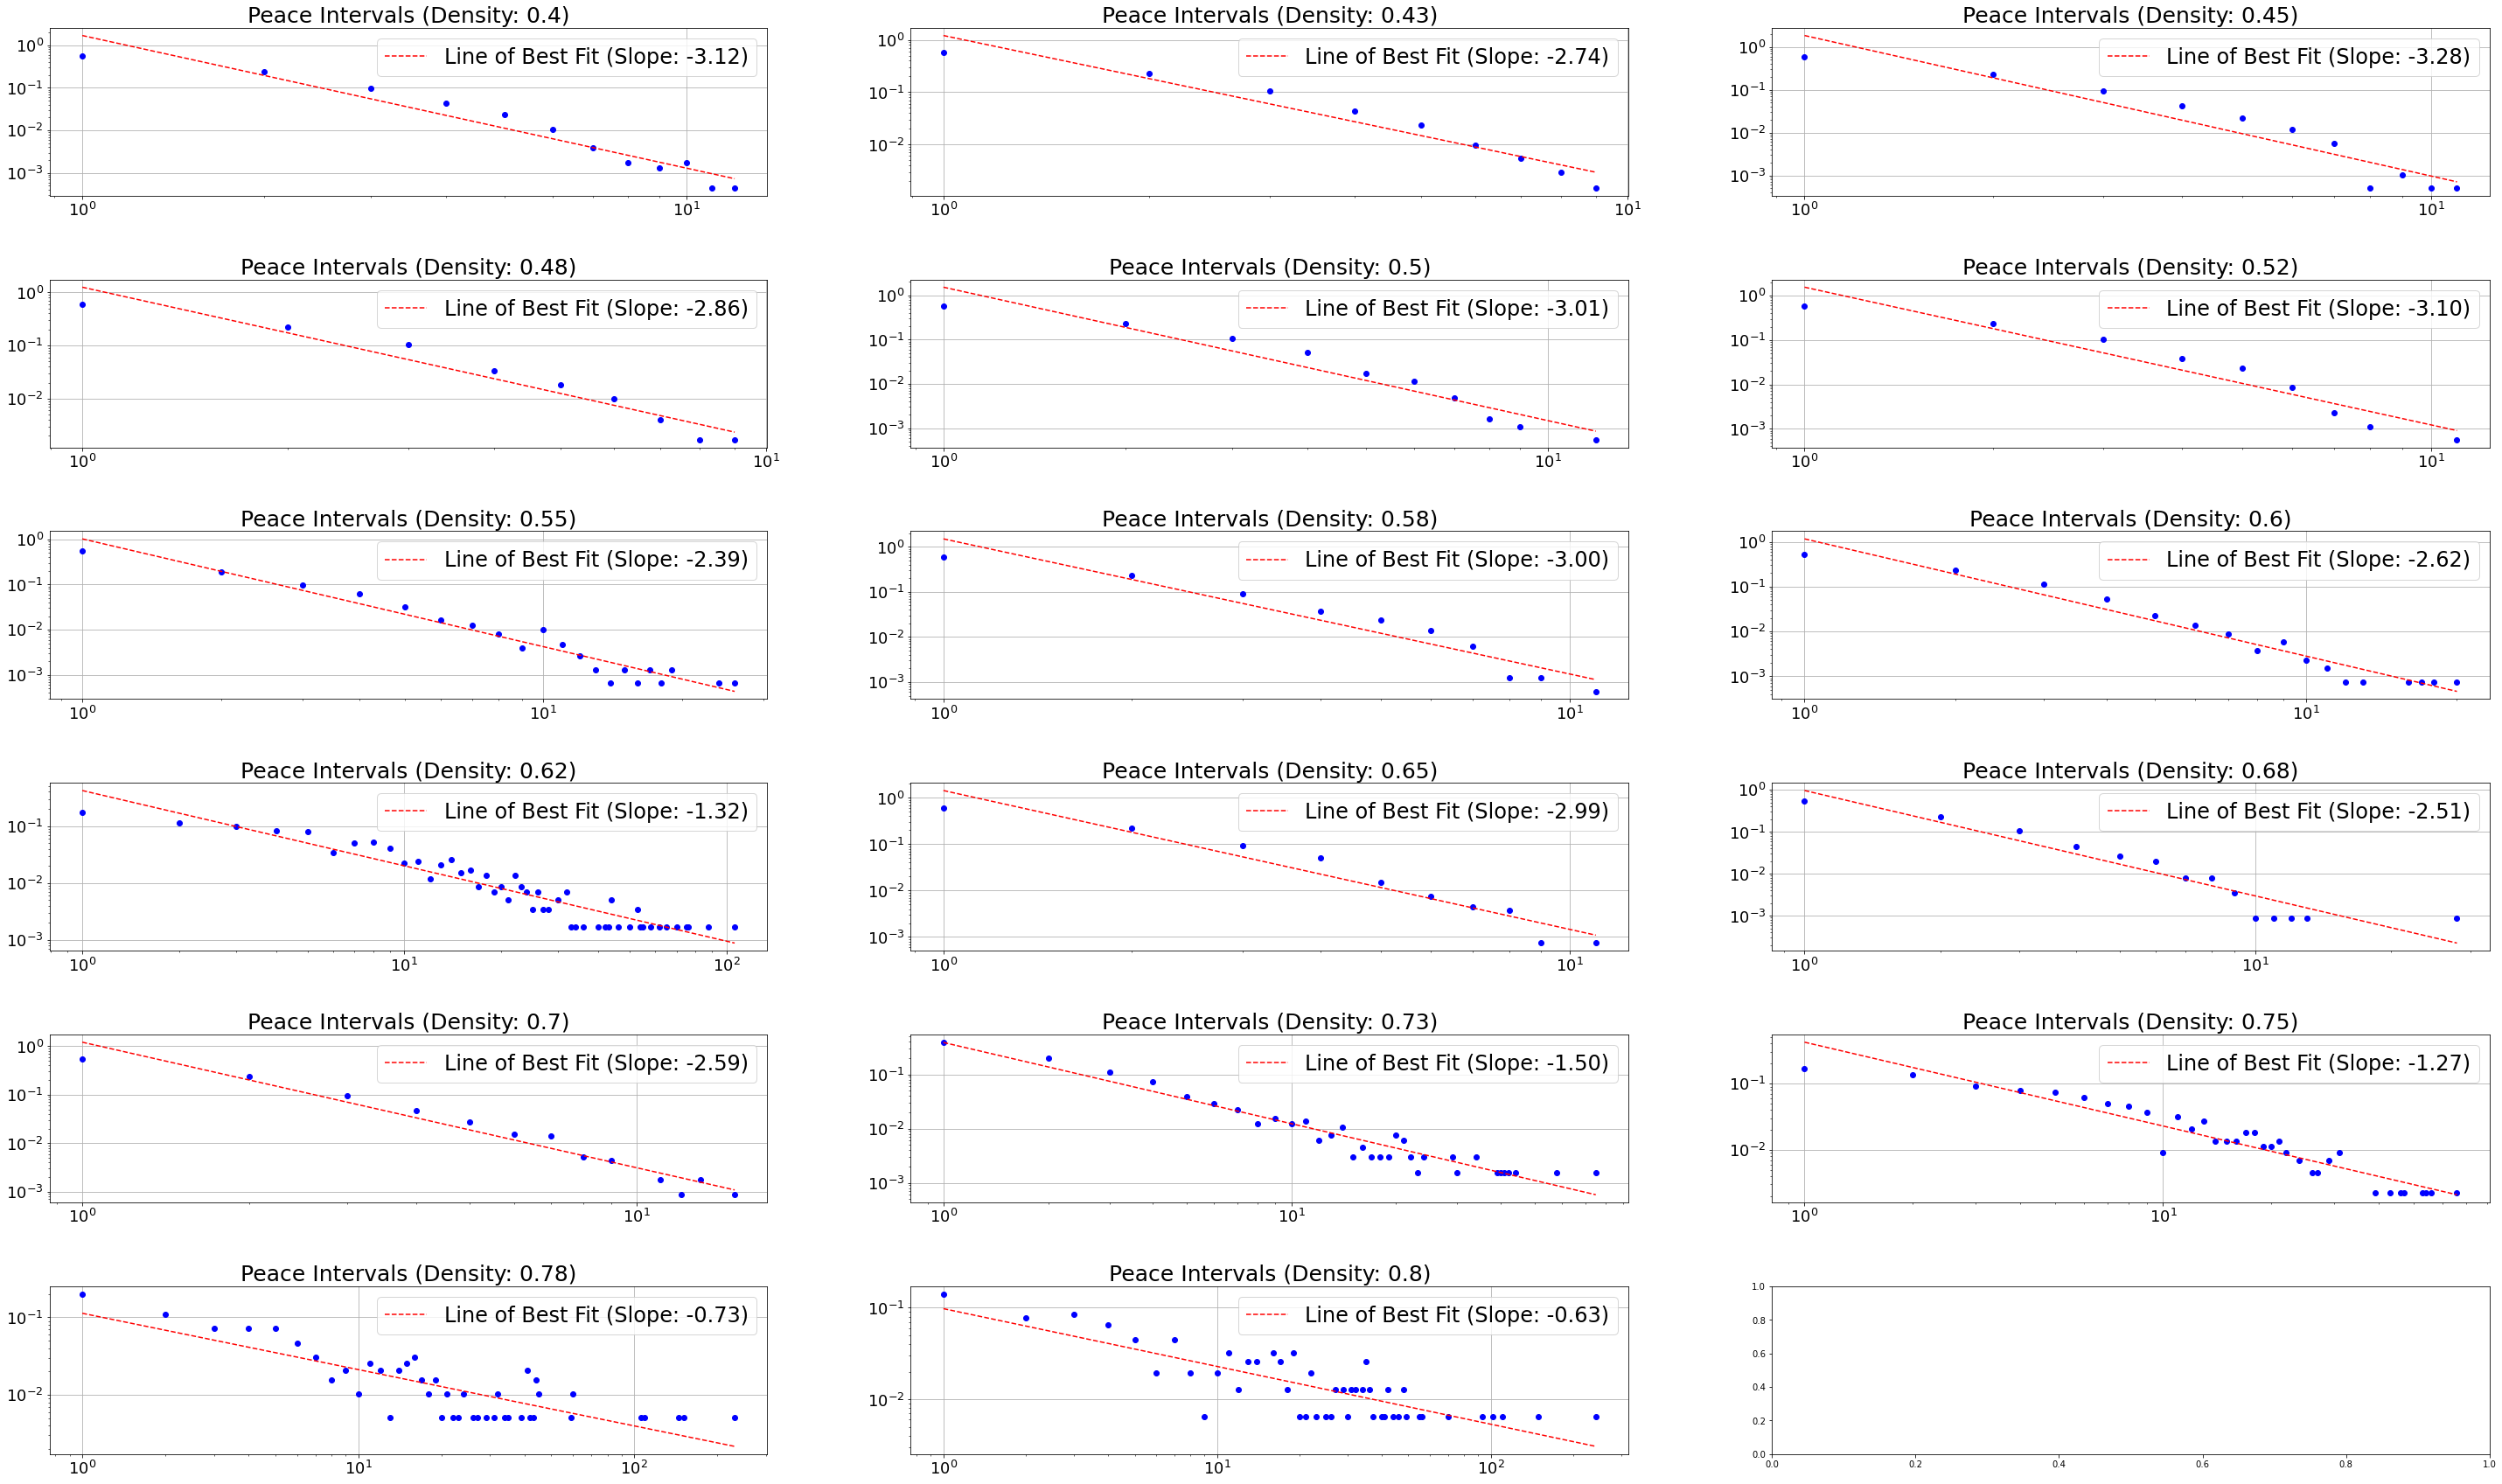

In [20]:
fig, axs = plt.subplots(6, 3, figsize=(50, 30), facecolor='white')
fig.subplots_adjust(hspace=0.5)

for i, density in enumerate(interval2):
    # Load the DataFrame from the corresponding CSV file
    df_filename = os.path.join(output_folder, f"df_density_{density}.csv")
    df = pd.read_csv(df_filename)
    
    # Calculate N based on density
    N = L * L - int(density * L * L) 
    peace = df[df["Status"] != 1].groupby((df["Status"] == 1).cumsum()).size().tolist()

    # Calculate the unique values and their respective frequencies
    unique_values, frequencies = np.unique(peace, return_counts=True)

    # Calculate the total number of data points
    total_data_points = len(peace)

    # Calculate the probability frequencies
    prob_frequencies = frequencies / total_data_points
    # Select the current subplot
    ax = axs[i // 3, i % 3]

    # Plot the probability frequency on a log-log scale
    ax.loglog(unique_values, prob_frequencies, marker='o', linestyle='', color='blue')

    # Perform linear regression to find the line that fits the data
    x = np.log10(unique_values).reshape(-1, 1)
    y = np.log10(prob_frequencies)
    reg = LinearRegression().fit(x, y)
    
    slope_list.append(reg.coef_[0])

    # Plot the line that fits the data
    ax.loglog(unique_values, 10 ** reg.predict(x), color='red', linestyle='--',
               label=f"Line of Best Fit (Slope: {reg.coef_[0]:.2f})")

    # Set the labels and title of the plot
    #ax.set_xlabel("Peace Intervals", fontsize=25)
    #ax.set_ylabel("Probability Frequency", fontsize=25)
    ax.set_title(f"Peace Intervals (Density: {density})", fontsize=25)

    # Add parameter information as a text annotation
    params_info = f"N: {N}\nλ: {N//3}"
    ax.text(0.5, 0.95, params_info, fontsize=18, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.8))

    ax.tick_params(axis='both', labelsize=18)

    # Increase the size of the legend
    ax.legend(fontsize=24)

    # Show the plot
    ax.grid(True)
plt.show()


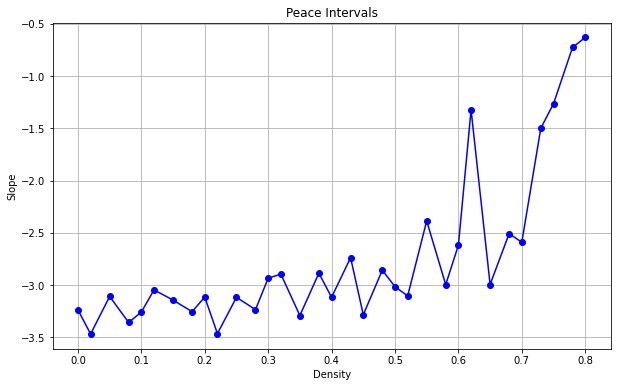

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
plt.plot(interval, slope_list, marker='o', linestyle='-', color='blue')

plt.xlabel('Density')
plt.ylabel('Slope')
plt.title('Peace Intervals')
plt.grid(True)
plt.show()

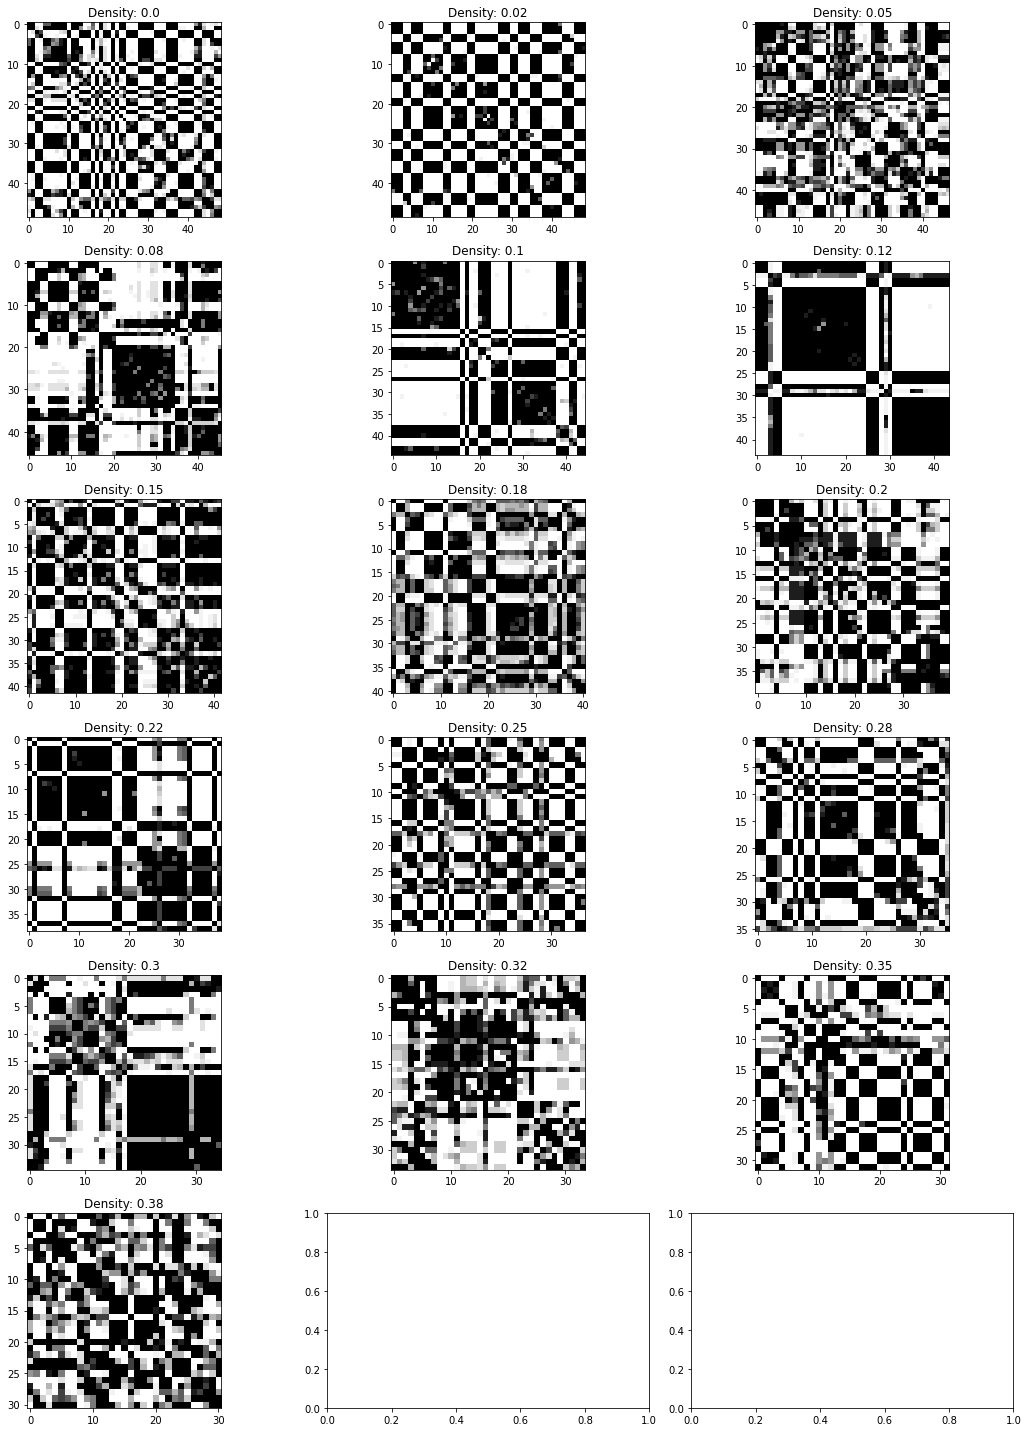

In [26]:
# Create a figure with a grid of panels
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

# Loop over the densities and plot the corresponding files
for i, density in enumerate(interval1):
    # Read the file
    file_path = os.path.join("outputfolder", "vecinal7x7", f"commitment_matrix_density_{density}.npy")
    data = np.load(file_path)

    # Plot the data in the corresponding panel
    ax = axes[i // 3, i % 3]
    ax.imshow(data, cmap='Greys')
    ax.set_title(f"Density: {density}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

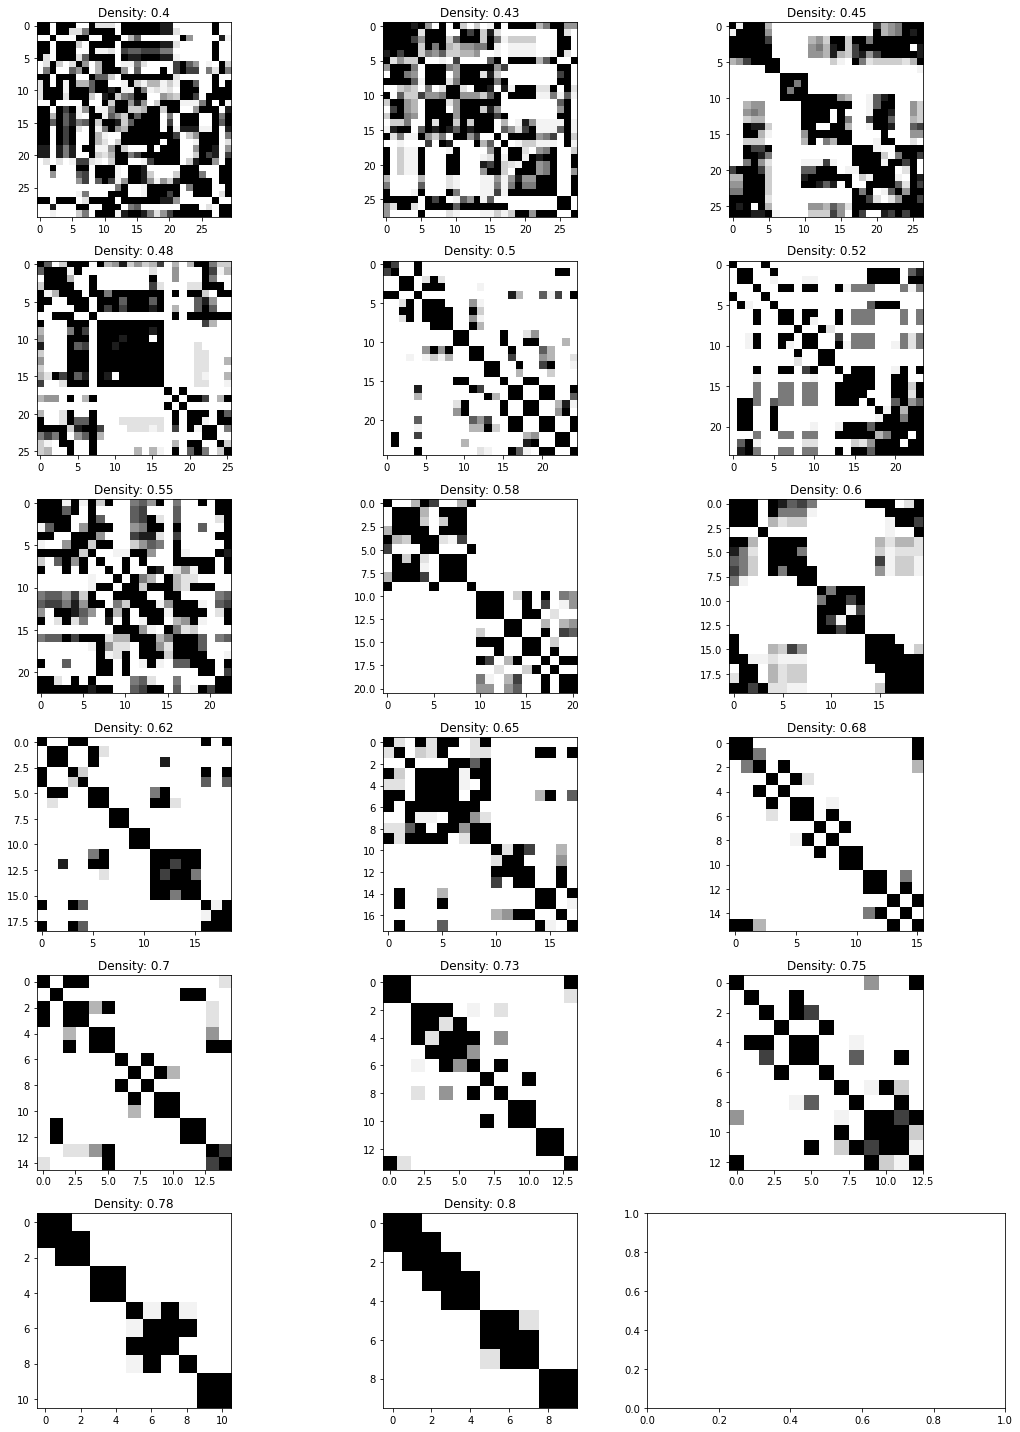

In [29]:
# Create a figure with a grid of panels
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

# Loop over the densities and plot the corresponding files
for i, density in enumerate(interval2):
    # Read the file
    file_path = os.path.join("outputfolder", "vecinal7x7", f"commitment_matrix_density_{density}.npy")
    data = np.load(file_path)

    # Plot the data in the corresponding panel
    ax = axes[i // 3, i % 3]
    ax.imshow(data, cmap='Greys')
    ax.set_title(f"Density: {density}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()